## **BAMS507 BA1 HW2 Group15**
#### **Thomson TIAN, 77491934**
#### **Daphne TSAI, 29520285**
#### **Pranav MEHTA, 19184282**

***
***

## **Question 1: Predictive Analytics**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import ttest_1samp

# Load data using your file reading method
df_problem = pd.read_csv('round1-day1_problem_data.csv')
df_truck_node = pd.read_csv('round1-day1_truck_node_data.csv')
df_demand_node = pd.read_csv('round1-day1_demand_node_data-1.csv')
df_demand_truck = pd.read_csv('round1-day1_demand_truck_data.csv')

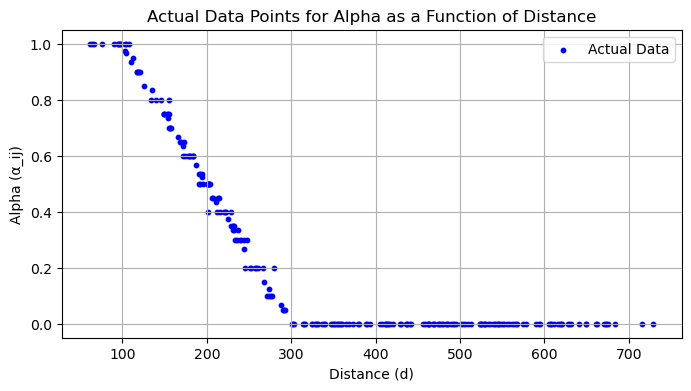

In [2]:
# Create a dictionary for demand values
demand_dict = dict(zip(df_demand_node['index'], df_demand_node['demand']))

# Calculate alpha_ij (scaled demand / total demand at demand node)
df_demand_truck['alpha_ij'] = df_demand_truck.apply(
    lambda row: row['scaled_demand'] / demand_dict[row['demand_node_index']] 
    if demand_dict[row['demand_node_index']] > 0 else 0, axis=1
)

# Extract distances and alpha_ij values
distances = df_demand_truck['distance'].values
alphas = df_demand_truck['alpha_ij'].values

# Plot only the actual data points
plt.figure(figsize=(8, 4))
plt.scatter(distances, alphas, color='blue', s=10, label="Actual Data")
plt.xlabel("Distance (d)")
plt.ylabel("Alpha (α_ij)")
plt.title("Actual Data Points for Alpha as a Function of Distance")
plt.legend()
plt.grid(True)  # Add grid to the plot
plt.show()

#### **Insight Summary**

The fraction of total demand (a_ij) exhibits **piecewise behavior** based on distance (d):

- 0 < d < 100 : a_ij = 1  (constant).
- 100 < d < 300 : a_ij decreases linearly from 1 to 0.
- d > 300 : a_ij = 0  (constant).

This suggests a_ij can be modeled using a **piecewise function**, reflecting how demand diminishes with distance.



### **Predictive Function: Piecewise Function**
$$
f(d) = 
\begin{cases} 
1 & \text{if } 0 \leq d < 100 & \text{, say Period 1} \\ 
-0.005 \cdot d + 1.5 & \text{if } 100 \leq d \leq 300 & \text{, say Period 2} \\ 
0 & \text{if } d > 300 & \text{, say Period 3} 
\end{cases}
$$


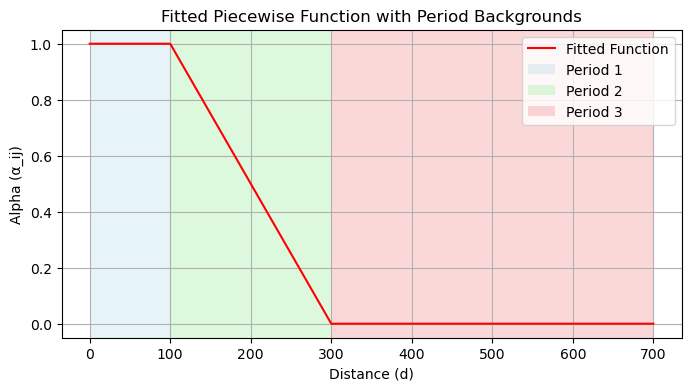

In [3]:
# Define the piecewise function
def fitted_piecewise_func(d):
    if d < 100:
        return 1
    elif 100 <= d <= 300:
        return -0.005 * d + 1.5
    else:
        return 0

# Generate distances for plotting
distances = np.linspace(0, 700, 1000)
alphas = np.array([fitted_piecewise_func(d) for d in distances])

# Plot the fitted function
plt.figure(figsize=(8, 4))
plt.plot(distances, alphas, color='red', label="Fitted Function")

# Add shaded background for different periods with transparency
plt.axvspan(0, 100, facecolor='lightblue', alpha=0.3, label="Period 1")
plt.axvspan(100, 300, facecolor='lightgreen', alpha=0.3, label="Period 2")
plt.axvspan(300, 700, facecolor='lightcoral', alpha=0.3, label="Period 3")

# Add labels, title, legend, and grid
plt.xlabel("Distance (d)")
plt.ylabel("Alpha (α_ij)")
plt.title("Fitted Piecewise Function with Period Backgrounds")
plt.legend()
plt.grid(True)
plt.show()

### **Fitted Function Data vs Actual Data**

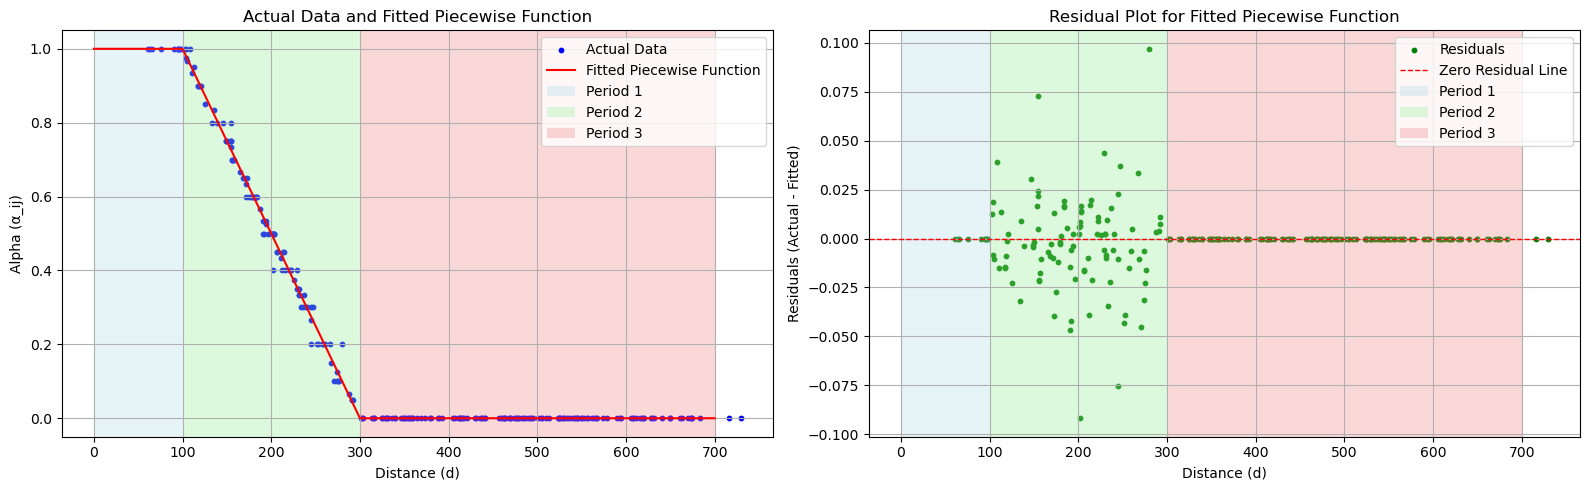

In [4]:
# Create a dictionary for demand values
demand_dict = dict(zip(df_demand_node['index'], df_demand_node['demand']))

# Calculate alpha_ij (scaled demand / total demand at demand node)
df_demand_truck['alpha_ij'] = df_demand_truck.apply(
    lambda row: row['scaled_demand'] / demand_dict[row['demand_node_index']] 
    if demand_dict[row['demand_node_index']] > 0 else 0, axis=1
)

# Extract distances and alpha_ij values
distances = df_demand_truck['distance'].values
alphas = df_demand_truck['alpha_ij'].values

# Define the fitted piecewise function
def fitted_piecewise_func(d):
    if d < 100:
        return 1
    elif 100 <= d <= 300:
        return -0.005 * d + 1.5
    else:
        return 0

# Generate fitted values for plotting
fitted_distances = np.linspace(0, 700, 1000)
fitted_alphas = np.array([fitted_piecewise_func(d) for d in fitted_distances])

# Calculate residuals (Actual - Fitted)
residuals = alphas - np.array([fitted_piecewise_func(d) for d in distances])

# Plot actual data and fitted function alongside the residual plot with background shading
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Subplot 1: Actual Data and Fitted Piecewise Function
axes[0].scatter(distances, alphas, color='blue', s=10, label="Actual Data")
axes[0].plot(fitted_distances, fitted_alphas, color='red', label="Fitted Piecewise Function")

# Add shaded background for different periods
axes[0].axvspan(0, 100, facecolor='lightblue', alpha=0.3, label="Period 1")
axes[0].axvspan(100, 300, facecolor='lightgreen', alpha=0.3, label="Period 2")
axes[0].axvspan(300, 700, facecolor='lightcoral', alpha=0.3, label="Period 3")

axes[0].set_xlabel("Distance (d)")
axes[0].set_ylabel("Alpha (α_ij)")
axes[0].set_title("Actual Data and Fitted Piecewise Function")
axes[0].legend()
axes[0].grid(True)

# Subplot 2: Residual Plot
axes[1].scatter(distances, residuals, color='green', s=10, label="Residuals")
axes[1].axhline(0, color='red', linestyle='--', linewidth=1, label="Zero Residual Line")

# Add shaded background for different periods
axes[1].axvspan(0, 100, facecolor='lightblue', alpha=0.3, label="Period 1")
axes[1].axvspan(100, 300, facecolor='lightgreen', alpha=0.3, label="Period 2")
axes[1].axvspan(300, 700, facecolor='lightcoral', alpha=0.3, label="Period 3")

axes[1].set_xlabel("Distance (d)")
axes[1].set_ylabel("Residuals (Actual - Fitted)")
axes[1].set_title("Residual Plot for Fitted Piecewise Function")
axes[1].legend()
axes[1].grid(True)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

### **Hypothesis to Test Accuracy**

In [5]:
# Null hypothesis (H0): The mean of the residuals is zero (indicating a good fit)
# Alternative hypothesis (H1): The mean of the residuals is not zero (indicating a poor fit)

# Perform a one-sample t-test for residuals
t_stat, p_value = ttest_1samp(residuals, 0)

# Significance level
alpha = 0.05

# Output the results
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < alpha:
    print("Reject the null hypothesis: The residuals do not have a mean of zero. The fit may not be accurate.")
else:
    print("Fail to reject the null hypothesis: The residuals have a mean of zero. The fit is likely accurate.")


T-statistic: -1.1551
P-value: 0.2492
Fail to reject the null hypothesis: The residuals have a mean of zero. The fit is likely accurate.


### **Q1 Summary**

- **Observed Behavior:**
  - $ \alpha_{ij} = 1 $ for $ d \leq 100 $.
  - $ \alpha_{ij} $ decreases linearly from $ 1 $ to $ 0 $ for $ 100 \leq d \leq 300 $.
  - $ \alpha_{ij} = 0 $ for $ d > 300 $.

- **Model:**:
  - The piecewise function:
$$
f(d) = 
\begin{cases} 
1 & \text{if } 0 \leq d < 100 & \text{, say Period 1} \\ 
-0.005 \cdot d + 1.5 & \text{if } 100 \leq d \leq 300 & \text{, say Period 2} \\ 
0 & \text{if } d > 300 & \text{, say Period 3} 
\end{cases}
$$

- **Validation:**:
  - Residuals are centered around zero.
  - One-sample t-test result: $ p = 0.2492 $, confirming the residuals' mean is zero.

#### **Conclusion:**
The piecewise function $ f(d) $ accurately models $ \alpha_{ij} $, with minimal residuals and strong statistical validation, making it reliable for demand prediction.

***
***

## **Question 2: Solving Optimization**

### **Parameters**
- $d_i$: Demand for customer $i \in I$.
- $c_{ij}$: Travel distance from customer $i \in I$ to truck $j \in J$.
- $\alpha_{ij}$: Demand multiplier for customer $i \in I$ and truck $j \in J$. This multiplier depends on the distance: the farther a customer $i$ is from a truck location $j$, the less willing the customer is to walk to the truck.
- $f$: Fixed cost that Guroble has to pay for placing a truck at a potential location.
- $r$: Revenue per burrito sold.
- $k$: Ingredient cost per burrito sold.

### **Decision Variables**
- $x_j = 1$ if we locate a truck at location $j$, and $0$ otherwise, for each $j \in J$.
- $y_{ij} = 1$ if the closest truck to customer $i \in I$ is at location $j \in J$ (i.e., if $i$ is assigned to $j$), and $0$ otherwise.


### **Objective Function and Constraints**
$$
\begin{aligned}
\text{Max:} & \quad \sum_{i \in I} \sum_{j \in J} (r - k)\cdot \alpha_{ij} \cdot d_i\cdot y_{ij} - \sum_{j \in J} f x_j \\[10pt]
\text{s.t.:} & \quad \sum_{j \in J} y_{ij} \leq 1, \quad \forall i \in I \\[5pt]
             & \quad y_{ij} \leq x_j, \quad \forall i \in I, \forall j \in J \\[5pt]
             & \quad x_j, y_{ij} \in \{0, 1\}, \quad \forall i \in I, \forall j \in J
\end{aligned}
$$


#### **Use Gurobi to Solve:**

In [6]:
from gurobipy import Model, GRB, quicksum
import pandas as pd

# Extract parameters
r = df_problem.loc[0, 'burrito_price']  # Revenue per unit
k = df_problem.loc[0, 'ingredient_cost']  # Cost per unit
f = df_problem.loc[0, 'truck_cost']  # Fixed cost per truck

# Create sets and parameters
I = df_demand_node['index'].tolist()  # List of demand nodes
J = df_truck_node['index'].tolist()  # List of truck nodes
demand = dict(zip(df_demand_node['index'], df_demand_node['demand']))  # Demand for each building

# Distance and scaled demand
distance = {(row['demand_node_index'], row['truck_node_index']): row['distance'] for _, row in df_demand_truck.iterrows()}
scaled_demand = {(row['demand_node_index'], row['truck_node_index']): row['scaled_demand'] for _, row in df_demand_truck.iterrows()}

# Truck coordinates
truck_coordinates = {row['index']: (row['x'], row['y']) for _, row in df_truck_node.iterrows()}

# Initialize model
model = Model("Maximize_Profit")

# Decision variables
x = model.addVars(J, vtype=GRB.BINARY, name="x")  # Binary variables for truck locations
y = model.addVars(I, J, vtype=GRB.BINARY, name="y")  # Binary variables for customer assignments

# Objective function: Maximize profit
model.setObjective(
    quicksum((r - k) * scaled_demand[i, j] * y[i, j] for i in I for j in J if (i, j) in scaled_demand) -
    quicksum(f * x[j] for j in J),
    GRB.MAXIMIZE
)

# Constraints
# Each customer is assigned to at most one truck
model.addConstrs((quicksum(y[i, j] for j in J if (i, j) in scaled_demand) <= 1 for i in I), name="Assign_Once")

# Only assign customers to open trucks
model.addConstrs((y[i, j] <= x[j] for i in I for j in J if (i, j) in scaled_demand), name="Open_Truck")

# Optimize the model
model.optimize()


Set parameter Username
Academic license - for non-commercial use only - expires 2025-09-02
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (mac64[arm] - Darwin 23.3.0 23D2057)

CPU model: Apple M3
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 255 rows, 256 columns and 720 nonzeros
Model fingerprint: 0x55fefeae
Variable types: 0 continuous, 256 integer (256 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [5e+00, 2e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective -0.0000000
Presolve removed 144 rows and 147 columns
Presolve time: 0.00s
Presolved: 111 rows, 109 columns, 288 nonzeros
Variable types: 0 continuous, 109 integer (109 binary)

Root relaxation: objective 6.000000e+02, 63 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent

#### **Print the Result:**

In [7]:
# Display results
if model.status == GRB.OPTIMAL:
    # Calculate components
    total_sales_revenue = sum((r * scaled_demand[i, j] * y[i, j].x) 
                              for i in I for j in J if (i, j) in scaled_demand)
    total_ingredient_cost = sum((k * scaled_demand[i, j] * y[i, j].x) 
                                for i in I for j in J if (i, j) in scaled_demand)
    total_truck_cost = sum(f * x[j].x for j in J)

    # Calculate total number of trucks used
    total_trucks_used = sum(x[j].x for j in J)

    # Print components
    print(f"Total Sales Revenue: {total_sales_revenue:.2f}")
    print(f"Total Ingredient Cost: {total_ingredient_cost:.2f}")
    print(f"Total Truck Cost: {total_truck_cost:.2f}")
    print(f"Total Number of Trucks Used: {int(total_trucks_used)}")
    print(f"Maximum Net Profit: {total_sales_revenue - total_ingredient_cost - total_truck_cost:.2f}\n")

    # Prepare formatted output
    results = []
    for j in J:
        if x[j].x > 0.5:  # If the truck is selected
            # Calculate truck profit
            truck_profit = sum((r - k) * scaled_demand[i, j] * y[i, j].x 
                               for i in I if (i, j) in scaled_demand) - f
            # Prepare assigned demands
            assigned_demands = {
                i: scaled_demand[i, j] * y[i, j].x
                for i in I if (i, j) in scaled_demand and y[i, j].x > 0
            }
            # Append to results
            results.append((j, truck_coordinates.get(j, (None, None)), truck_profit, assigned_demands))

    # Display results in formatted style
    for truck, coordinates, profit, demands in results:
        print(f"Truck {truck} is open at coordinates {coordinates}:")
        print(f"Assigned demand from buildings:")
        for building, value in demands.items():
            print(f"  Building {building}: {value:.1f} units")
        print(f"Truck Profit (after fixed cost): {profit:.2f}\n")

else:
    print("No optimal solution found.")




Total Sales Revenue: 2200.00
Total Ingredient Cost: 1100.00
Total Truck Cost: 500.00
Total Number of Trucks Used: 2
Maximum Net Profit: 600.00

Truck truck22 is open at coordinates (356.2811540822591, 145.63272120200335):
Assigned demand from buildings:
  Building demand4: 14.0 units
  Building demand5: 8.0 units
  Building demand7: 5.0 units
  Building demand8: 25.0 units
  Building demand53: 15.0 units
  Building demand11: 13.0 units
  Building demand22: 5.0 units
  Building demand51: 27.0 units
Truck Profit (after fixed cost): 310.00

Truck truck37 is open at coordinates (209.35788827501537, 398.3939899833055):
Assigned demand from buildings:
  Building demand31: 5.0 units
  Building demand32: 29.0 units
  Building demand33: 40.0 units
  Building demand44: 13.0 units
  Building demand46: 5.0 units
  Building demand43: 1.0 units
  Building demand41: 15.0 units
Truck Profit (after fixed cost): 290.00



#### **Use Graph to Show:**

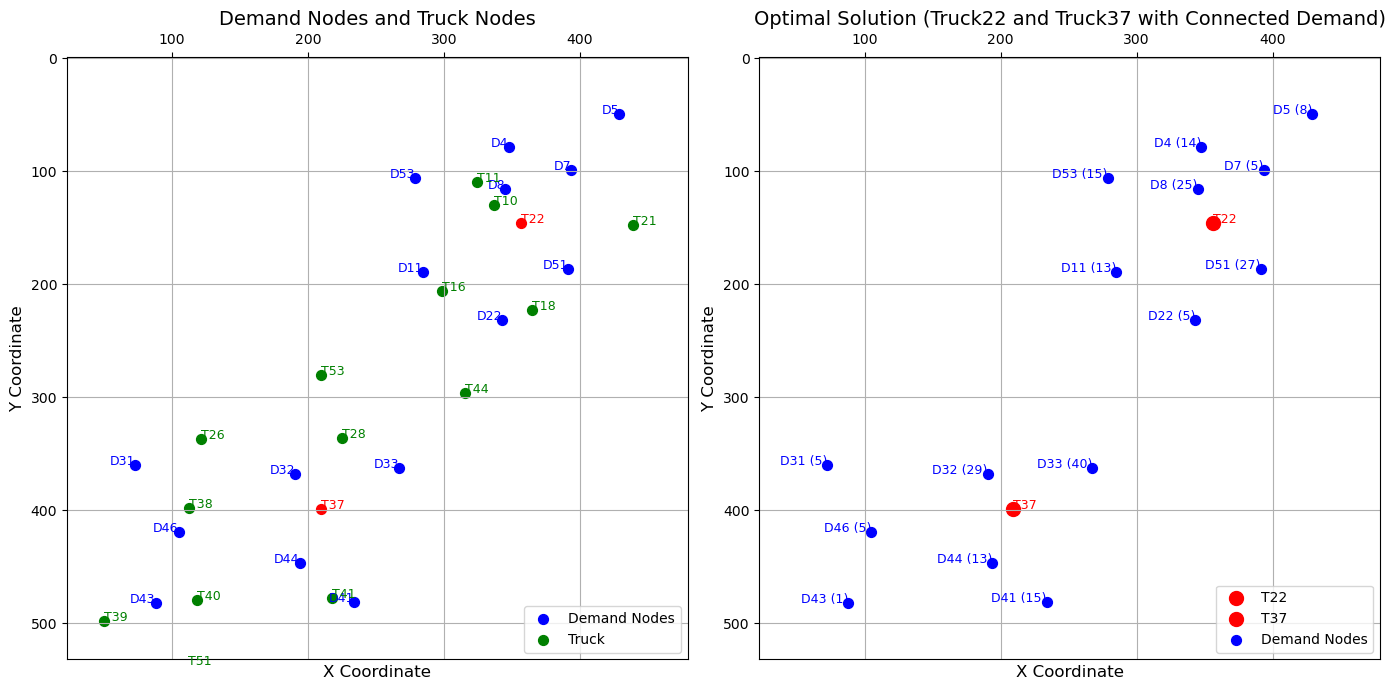

In [8]:
# --- First Plot: All Demand Nodes and Truck Nodes ---
# Extract x, y coordinates and labels for demand nodes
demand_x_coords = df_demand_node['x']
demand_y_coords = df_demand_node['y']
demand_labels = ["D" + label[6:] for label in df_demand_node['index']]

# Extract x, y coordinates and labels for truck nodes
truck_x_coords = df_truck_node['x']
truck_y_coords = df_truck_node['y']
truck_labels = ["T" + label[5:] for label in df_truck_node['index']]

# --- Second Plot: Truck22 and Truck37 with Connected Demand Nodes ---
# Extract demand nodes corresponding to truck22 and truck37 with scaled_demand > 0
truck_targets = ['truck22', 'truck37']
filtered_df = df_demand_truck[
    (df_demand_truck['truck_node_index'].isin(truck_targets)) &
    (df_demand_truck['scaled_demand'] > 0)
]

# Get unique demand node indices
demand_node_indices = filtered_df['demand_node_index'].unique()

# Filter demand nodes data
filtered_demand_nodes = df_demand_node[df_demand_node['index'].isin(demand_node_indices)]

# Extract truck node coordinates (manually define as per the provided truck data)
truck_coords = {
    'truck22': {'x': 356.2811540822591, 'y': 145.63272120200335},
    'truck37': {'x': 209.3578827501537, 'y': 398.393989983055}
}

# Create a mapping of demand nodes to their scaled demands
scaled_demand_mapping = {
    (row['demand_node_index'], row['truck_node_index']): row['scaled_demand']
    for _, row in filtered_df.iterrows()
}

# Set axis limits based on the first plot's coordinate range
x_min, x_max = demand_x_coords.min() - 50, demand_x_coords.max() + 50
y_min, y_max = demand_y_coords.min() - 50, demand_y_coords.max() + 50

# --- Create Side-by-Side Plots ---
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Plot 1: All Demand Nodes and Truck Nodes
axes[0].scatter(demand_x_coords, demand_y_coords, color='blue', s=50, label="Demand Nodes")
for i, label in enumerate(demand_labels):
    axes[0].text(demand_x_coords[i], demand_y_coords[i], label, fontsize=9, ha='right', color='blue')
for i, label in enumerate(truck_labels):
    if label == "T22" or label == "T37":
        axes[0].scatter(truck_x_coords[i], truck_y_coords[i], color='red', s=50, label=None)
        axes[0].text(truck_x_coords[i], truck_y_coords[i], label, fontsize=9, ha='left', color='red')
    else:
        axes[0].scatter(truck_x_coords[i], truck_y_coords[i], color='green', s=50, label=None)
        axes[0].text(truck_x_coords[i], truck_y_coords[i], label, fontsize=9, ha='left', color='green')
axes[0].set_title("Demand Nodes and Truck Nodes", fontsize=14)
axes[0].set_xlabel("X Coordinate", fontsize=12)
axes[0].set_ylabel("Y Coordinate", fontsize=12)
axes[0].set_xlim(x_min, x_max)
axes[0].set_ylim(y_min, y_max)
axes[0].invert_yaxis()
axes[0].xaxis.tick_top()  # Move x-axis ticks to the top
axes[0].grid(True)
axes[0].legend(["Demand Nodes", "Truck"], loc="lower right")

# Plot 2: Truck22 and Truck37 with Connected Demand Nodes
for truck, coords in truck_coords.items():
    axes[1].scatter(coords['x'], coords['y'], color='red', s=100, label=f"T{truck[5:]}")
    axes[1].text(coords['x'], coords['y'], f"T{truck[5:]}", fontsize=9, ha='left', color='red')
axes[1].scatter(filtered_demand_nodes['x'], filtered_demand_nodes['y'], color='blue', s=50, label="Demand Nodes")
for i, row in filtered_demand_nodes.iterrows():
    for truck in truck_targets:
        scaled_demand = scaled_demand_mapping.get((row['index'], truck), 0)
        if scaled_demand > 0:
            axes[1].text(
                row['x'], row['y'],
                f"D{row['index'][6:]} ({scaled_demand})",
                fontsize=9, ha='right', color='blue'
            )
axes[1].set_title("Optimal Solution (Truck22 and Truck37 with Connected Demand)", fontsize=14)
axes[1].set_xlabel("X Coordinate", fontsize=12)
axes[1].set_ylabel("Y Coordinate", fontsize=12)
axes[1].set_xlim(x_min, x_max)
axes[1].set_ylim(y_min, y_max)
axes[1].invert_yaxis()
axes[1].xaxis.tick_top()  # Move x-axis ticks to the top
axes[1].grid(True)
axes[1].legend(loc="lower right")

plt.tight_layout()
plt.show()


### **Q2 Summary**

#### **Comparison of Results:**
1. **Provided Gurobi Solution:**:
   - **Revenue**: €2,200.
   - **Ingredient Cost**: €1,100.
   - **Truck Cost**: €500.
   - **Total Profit**: €600.

2. **Derived Results:**:
   - **Revenue**: €2,200 (matches the provided solution).
   - **Ingredient Cost**: €1,100 (matches the provided solution).
   - **Truck Cost**: €500 (matches the provided solution).
   - **Total Profit**: €600 (matches the provided solution).
   - **Optimal Truck Locations**:
     - **Truck22**: (356.28, 145.63), Profit: €310.
     - **Truck37**: (209.36, 398.39), Profit: €290.
   - **Visualization**:
     - Demand and truck nodes were plotted with connections to capture relationships.
     - Scaled demand was displayed for each connected demand node.

#### **Conclusion:** 
The derived solution perfectly aligns with the Gurobi-provided results in terms of revenue, costs, truck placements, and total profit. Both solutions confirm the optimal truck placements (Truck22 and Truck37) and demonstrate their contributions to demand capture and profitability. The visualizations validate the relationships between truck locations and connected demand nodes, ensuring an accurate and efficient solution. This reinforces confidence in the implemented optimization model and highlights its effectiveness in solving the problem.


***
***

## **Q3: True or False**
### **Whether $\sum_{j \in J} y_{ij} = 1 \text{ with positive demand}$ is True?**
### **Answer: False**

### **Explanation**
$$
\begin{aligned}
\sum_{j \in J} y_{ij} \leq 1 \quad \forall i \in I 
\end{aligned}
$$

**The Constraint: $\sum_{j \in J} y_{ij} \leq 1 \quad \forall i \in I $** ensures that each demand point $i$ can be assigned to at most one truck $j$. For this to be a **binding constraint** (i.e., when $\sum_{j \in J} y_{ij} = 1$), the following two conditions must be met:

1. **Positive Demand ($d_i > 0$)**: The demand point $i$ must have customers to serve.
2. **Non-Zero Scaled Demand ($\alpha_{ij} > 0$)**: At least one truck $j$ must have a non-zero demand multiplier $\alpha_{ij}$, meaning that customers at demand point $i$ are willing to walk to the truck.

If **$\alpha_{ij} = 0$** for all trucks $j$, no customers at demand point $i$ are willing to visit any truck, even if $d_i > 0$. In this case:
- $y_{ij} = 0 \quad \forall j \in J$,
- The constraint is **not binding**, and $\sum_{j \in J} y_{ij} = 0$.


#### **Examples:**

- **Case 1 (Binding, $\sum_{j \in J} y_{ij} = 1$)**:
  - Demand point $i$: $d_i = 10$,
  - Trucks: $j_1, j_2, j_3$,
  - $\alpha_{ij_1} = 0.5$, $\alpha_{ij_2} = 0.3$, $\alpha_{ij_3} = 0$,
  - **Result**: Demand point $i$ is assigned to truck $j_1$ because $d_i > 0$ and $\alpha_{ij_1} > 0$.
  - **Conclusion**: $\sum_{j \in J} y_{ij} = 1$.

- **Case 2 (Not Binding, $\sum_{j \in J} y_{ij} = 0$)**:
  - Demand point $i$: $d_i = 10$,
  - Trucks: $j_1, j_2, j_3$,
  - $\alpha_{ij_1} = 0$, $\alpha_{ij_2} = 0$, $\alpha_{ij_3} = 0$,
  - **Result**: No truck can serve demand point $i$ because all $\alpha_{ij} = 0$.
  - **Conclusion**: $\sum_{j \in J} y_{ij} = 0$.


#### **Conclusion:**

The statement is **False** because $\sum_{j \in J} y_{ij} = 1$ does not always hold. It depends on whether demand exists ($d_i > 0$) and whether there are trucks within a feasible distance ($\alpha_{ij} > 0$). If no truck meets these conditions, the constraint will not bind, and the demand point $i$ will not be served.


***
***

## **Q4: True of False**
### **Can The Variable $y_{ij}$ Be Continuous?**
### **Answer: True**
-   If we allow the $ y_{ij} $ variables to be continuous ($ 0 \leq y_{ij} \leq 1 $), the optimal solution will still assign binary values ($ y_{ij} \in \{0, 1\} $). This is due to the problem structure and the characteristics of the objective function.
-   **However**, in rare edge cases where a building $i$ is equidistant from two trucks, and both trucks are **already placed**, the optimizer may split the demand allocation equally, resulting in fractional $y_{ij}$ values (e.g., $y_{ij_1} = 0.5$ and $y_{ij_2} = 0.5$). Despite this, when using Gurobi, most solutions will remain integer due to its preference for vertex solutions in the LP feasible region.
### **Explaintion for True:**

#### <u>**Reasoning 1 (Network Flow Problem):**</u>
This problem is a **network flow problem**, and when the **supply and demand constraints are integers**, the assignment of customers to trucks naturally results in integer solutions.

##### **Key Constraints:**
1. **Supply Constraint:**  
   - The truck location variable $x_j$ is binary: 
   - $ x_j \in \{0, 1\}, \, \forall j \in J $
   - This ensures that trucks are either open or closed, which influences the values of $y_{ij}$.

2. **Demand Constraint:**  
   - Each building $i$ can be assigned to at most one truck:
   - $\sum_{j \in J} y_{ij} \leq 1, \, \forall i \in I $
   - If $ \sum_{j \in J} y_{ij} = 1 $, the demand of building $i$ is fully satisfied. Since the input demand data are integers, the assignment will naturally be binary.

##### **Inherent Integer Properties:**
   1. The ***df_demand_node*** dataset provides integer demand values.
   2. Assignments are inherently binary (a building is either assigned to a truck or not), making $y_{ij}$ binary by nature.


<hr style="border: 0.1px dashed;">

#### <u>**Reasoning 2 (Objective Function):**</u>
The objective function maximizes profit:
$$
\text{maximize } \sum_{i \in I} \sum_{j \in J} (r - k) \alpha_{ij} d_i y_{ij} - \sum_{j \in J} f x_j
$$

- To maximize profit, the solver assigns $y_{ij} = 1$ for the truck $j$ with the highest scaled demand and the lowest cost, and $y_{ij} = 0$ for others.
- Fractional values for $y_{ij}$ (e.g., $y_{ij} = 0.5$) dilute the profit and are therefore suboptimal.

##### **Example:**
- For building $i$, truck $j_1$ capturing its entire demand ($y_{ij_1} = 1$) maximizes profit.
- If $y_{ij_1} = 0.5$ and $y_{ij_2} = 0.5$, neither truck fully captures the demand, resulting in reduced profit.


<hr style="border: 0.1px dashed;">

#### <u>**Reasoning 3 (Validation Results):**</u>

By relaxing the decision variable $ y_{ij} $ from binary to continuous ($ 0 \leq y_{ij} \leq 1 $), the optimization results remain unchanged compared to the previous binary constraint model. This includes total profit, truck assignments, and corresponding profits and coordinates. This demonstrates that:

1. **Robust Constraint Design**: The model's constraints effectively drive the solution towards binary results, even with relaxed variable bounds.

2. **Result Consistency**: Relaxing the variables does not impact the quality of the solution, confirming the validity and efficiency of this simplification.

##### **Modifications Explained:**

1. **Change $ y_{ij} $ to Continuous Variables**:

   ```python
   y = model.addVars(I, J, vtype=GRB.CONTINUOUS, lb=0, ub=1, name="y")

2. **Adjust Constraints and Objective Function** to align with the new definition of $ y_{ij} $.


In [9]:
from gurobipy import Model, GRB, quicksum
import pandas as pd

# Extract parameters
r = df_problem.loc[0, 'burrito_price']  # Revenue per unit
k = df_problem.loc[0, 'ingredient_cost']  # Cost per unit
f = df_problem.loc[0, 'truck_cost']  # Fixed cost per truck

# Create sets and parameters
I = df_demand_node['index'].tolist()  # List of demand nodes
J = df_truck_node['index'].tolist()  # List of truck nodes
demand = dict(zip(df_demand_node['index'], df_demand_node['demand']))  # Demand for each building

# Distance and scaled demand
distance = {(row['demand_node_index'], row['truck_node_index']): row['distance'] for _, row in df_demand_truck.iterrows()}
scaled_demand = {(row['demand_node_index'], row['truck_node_index']): row['scaled_demand'] for _, row in df_demand_truck.iterrows()}

# Truck coordinates
truck_coordinates = {row['index']: (row['x'], row['y']) for _, row in df_truck_node.iterrows()}

# Initialize model
model = Model("Maximize_Profit")

# Decision variables
x = model.addVars(J, vtype=GRB.BINARY, name="x")  # Binary variables for truck locations
y = model.addVars(I, J, vtype=GRB.CONTINUOUS, lb=0, ub=1, name="y")  # Continuous variables for customer assignments

# Objective function: Maximize profit
model.setObjective(
    quicksum((r - k) * scaled_demand[i, j] * y[i, j] for i in I for j in J if (i, j) in scaled_demand) -
    quicksum(f * x[j] for j in J),
    GRB.MAXIMIZE
)

# Constraints
# Each customer is assigned to at most one truck (adjusted for continuous y)
model.addConstrs((quicksum(y[i, j] for j in J if (i, j) in scaled_demand) <= 1 for i in I), name="Assign_Once")

# Only assign customers to open trucks (adjusted for continuous y)
model.addConstrs((y[i, j] <= x[j] for i in I for j in J if (i, j) in scaled_demand), name="Open_Truck")

# Optimize the model
model.optimize()

Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (mac64[arm] - Darwin 23.3.0 23D2057)

CPU model: Apple M3
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 255 rows, 256 columns and 720 nonzeros
Model fingerprint: 0xefc0cd20
Variable types: 240 continuous, 16 integer (16 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [5e+00, 2e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective -0.0000000
Presolve removed 144 rows and 147 columns
Presolve time: 0.00s
Presolved: 111 rows, 109 columns, 288 nonzeros
Variable types: 96 continuous, 13 integer (13 binary)

Root relaxation: objective 6.000000e+02, 63 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0     600.0000000  600.00000  0.

In [10]:
# Display results
if model.status == GRB.OPTIMAL:
    
    # Calculate components
    total_sales_revenue = sum((r * scaled_demand[i, j] * y[i, j].x) 
                              for i in I for j in J if (i, j) in scaled_demand)
    total_ingredient_cost = sum((k * scaled_demand[i, j] * y[i, j].x) 
                                for i in I for j in J if (i, j) in scaled_demand)
    total_truck_cost = sum(f * x[j].x for j in J)

    # Print components
    print(f"Total Sales Revenue: {total_sales_revenue:.2f}")
    print(f"Total Ingredient Cost: {total_ingredient_cost:.2f}")
    print(f"Total Truck Cost: {total_truck_cost:.2f}")
    print(f"Maximum Net Profit: {total_sales_revenue - total_ingredient_cost - total_truck_cost:.2f}\n")

    # Display details for each selected truck
    for j in J:
        if x[j].x > 0.5:  # If the truck is selected
            # Calculate truck profit
            truck_profit = sum((r - k) * scaled_demand[i, j] * y[i, j].x 
                               for i in I if (i, j) in scaled_demand) - f
            # Prepare assigned demands
            assigned_demands = {
                i: scaled_demand[i, j] * y[i, j].x
                for i in I if (i, j) in scaled_demand and y[i, j].x > 0
            }

            # Print truck details
            print(f"Truck {j}:")
            print(f"  Coordinates: {truck_coordinates.get(j, (None, None))}")
            print(f"  Profit (after fixed cost): {truck_profit:.2f}")
            print(f"  Assigned demand from buildings:")
            for building, value in assigned_demands.items():
                print(f"    Building {building}: {value:.1f} units")
            print()

else:
    print("No optimal solution found.")




Total Sales Revenue: 2200.00
Total Ingredient Cost: 1100.00
Total Truck Cost: 500.00
Maximum Net Profit: 600.00

Truck truck22:
  Coordinates: (356.2811540822591, 145.63272120200335)
  Profit (after fixed cost): 310.00
  Assigned demand from buildings:
    Building demand4: 14.0 units
    Building demand5: 8.0 units
    Building demand7: 5.0 units
    Building demand8: 25.0 units
    Building demand53: 15.0 units
    Building demand11: 13.0 units
    Building demand22: 5.0 units
    Building demand51: 27.0 units

Truck truck37:
  Coordinates: (209.35788827501537, 398.3939899833055)
  Profit (after fixed cost): 290.00
  Assigned demand from buildings:
    Building demand31: 5.0 units
    Building demand32: 29.0 units
    Building demand33: 40.0 units
    Building demand44: 13.0 units
    Building demand46: 5.0 units
    Building demand43: 1.0 units
    Building demand41: 15.0 units



<hr style="border: 0.1px dashed;">

### <u>**Explanation for False:**</u>

In most practical scenarios, the optimization model's structure and the objective function encourage $y_{ij}$ to take binary values (0 or 1). However, there is a specific edge case where this assumption **may not hold**.

#### **Special Case: Tie in Distance**
This case occurs **only when two trucks are already placed**, which is guaranteed by other parts of the optimization. If a building $i$ is equidistant from two trucks, say $j_1$ and $j_2$, and the scaled demand weight ($\alpha_{ij}$) is equal for both trucks, the optimizer might split the demand allocation equally.

- **Scenario:**  
   Two trucks, **T10** and **T18**, are **already placed** as part of the solution.
- Building $i$:D5
- Truck $j_1$: T10, Truck $j_2$: T18  
- Distance from D5 to T10 = 20  
- Distance from D5 to T18 = 20  
- Demand from $i$: $d_i = 10$

The optimizer might allocate:
- $y_{i,j_1} = 0.5 \times 10 = 5$  
- $y_{i,j_2} = 0.5 \times 10 = 5$  

This results in **non-binary values** for $y_{ij}$, even if the $y_{ij}$ variables are continuous.

**Clarification Regarding Reasoning 2**
  - Reasoning 2 holds true for scenarios where the optimizer is free to decide truck placement and demand allocation simultaneously. In this special edge case, **the presence of two trucks is already guaranteed**, creating the conditions for a tie in allocation. This ensures that Reasoning 2 and this explanation do not contradict.

**Gurobi's Behavior**
  - In Gurobi's optimal solution algorithm, if multiple solutions exist, the solver often identifies solutions along the **edges** of the LP feasible region. For such cases, Gurobi tends to provide **vertex solutions**, which are generally integer values. 

**Why This Matters:**  
  - In this case, the vertex solution happens to align with integer results. Therefore, when solving with Gurobi, **the majority of solutions will still result in integer values for $y_{ij}$**, even though the variables are defined as continuous.


***
***

## **Question 5: Reformulated Optimization Problem Using $q_{ij}$**

To reformulate the problem using $q_{ij}$ as the decision variable to represent the quantity of demand assigned from building $i$ to truck $j$, while keeping $x_j$ as the binary variable indicating truck placement, the formulation is as follows:

### **Decision Variables:**
1. $x_j$: Binary variable, $x_j = 1$ if truck $j$ is opened, $0$ otherwise.
2. $q_{ij}$: Continuous variable, representing the quantity of demand assigned from building $i$ to truck $j$, where $q_{ij} \geq 0$.


### **Parameters:**
1. $r$: Revenue per unit of demand.
2. $k$: Cost per unit of demand (ingredient cost).
3. $f$: Fixed cost for opening truck $j$.
4. $d_i$: Demand at building $i$.
5. $\alpha_{ij}$: Scaling factor representing the fraction of demand at building $i$ that actually walks to truck $j$, considering distance.


### **Objective Function:**
$$ 
\text{Maximize } \sum_{i \in I} \sum_{j \in J} (r - k) \cdot \alpha_{ij} \cdot q_{ij} - \sum_{j \in J} f \cdot x_j
$$


### **Constraints:**
1. **Demand Assignment Constraint**:
   $$ 
   \sum_{j \in J} q_{ij} \leq d_i \quad \forall i \in I 
   $$
   This ensures that the total quantity assigned from a building $i$ does not exceed its total demand $d_i$.

2. **Assignment Allowed Only to Open Trucks**:
   $$ 
   q_{ij} \leq d_i \cdot x_j \quad \forall i \in I, \forall j \in J 
   $$
   This ensures that demand from building $i$ can only be assigned to truck $j$ if the truck is open.

3. **Non-Negativity Constraint**:
   $$
   q_{ij} \geq 0 \quad \forall i \in I, \forall j \in J
   $$
   $$
   q_{ij} \in \mathbb{Z}_+ \quad \forall i \in I, \forall j \in J
   $$
   Ensures that all demand assignments are non-negative integer number.

4. **Binary Constraint for Truck Decisions**:
   $$
   x_j \in \{0, 1\} \quad \forall j \in J
   $$
   Ensures that $x_j$ correctly represents whether a truck is placed at location $j$.

This formulation retains the binary decision variables $x_j$ from the original problem while introducing $q_{ij}$ to allocate demand more flexibly. The model adheres to the original problem's structure while adapting it to use $q_{ij}$.

### **Objective Function and Constraints**
$$
\begin{aligned}
\text{Max:} & \quad \sum_{i \in I} \sum_{j \in J} (r - k) \cdot \alpha_{ij}\cdot q_{ij} - \sum_{j \in J} f x_j \\[10pt]
\text{s.t.:} & \quad \sum_{j \in J} q_{ij} \leq d_i, \quad \forall i \in I \\[5pt]
             & \quad q_{ij} \geq 0, \quad \forall i \in I, \forall j \in J \\[5pt]
             & \quad q_{ij} \in \mathbb{Z}_+, \quad \forall i \in I, \forall j \in J \\[5pt] 
             & \quad q_{ij} \leq d_i \cdot x_j, \quad \forall i \in I, \forall j \in J \\[5pt]
             & \quad x_j \in \{0, 1\}, \quad \forall j \in J
\end{aligned}
$$


#### **Use Gurobi to Solve:**

In [11]:
# Extract parameters
r = df_problem.loc[0, 'burrito_price']  # Revenue per unit
k = df_problem.loc[0, 'ingredient_cost']  # Cost per unit
f = df_problem.loc[0, 'truck_cost']  # Fixed cost per truck

# Create sets and parameters
I = df_demand_node['index'].tolist()  # List of demand nodes
J = df_truck_node['index'].tolist()  # List of truck nodes
demand = dict(zip(df_demand_node['index'], df_demand_node['demand']))  # Demand for each building

# Distance and scaled demand
distance = {(row['demand_node_index'], row['truck_node_index']): row['distance'] for _, row in df_demand_truck.iterrows()}
scaled_demand = {(row['demand_node_index'], row['truck_node_index']): row['scaled_demand'] for _, row in df_demand_truck.iterrows()}

# Truck coordinates
truck_coordinates = {row['index']: (row['x'], row['y']) for _, row in df_truck_node.iterrows()}

# Initialize model
model = Model("Maximize_Profit")

# Decision variables
x = model.addVars(J, vtype=GRB.BINARY, name="x")  # Binary variables for truck locations
q = model.addVars(I, J, vtype=GRB.INTEGER, lb=0, name="q")  # Continuous variables for demand allocation

# Objective function: Maximize profit
model.setObjective(
    quicksum((r - k) * q[i, j] for i in I for j in J if (i, j) in scaled_demand) -
    quicksum(f * x[j] for j in J),
    GRB.MAXIMIZE
)

# Constraints
# Total allocated demand for each building cannot exceed its total demand
model.addConstrs(
    (quicksum(q[i, j] for j in J if (i, j) in scaled_demand) <= demand[i] for i in I),
    name="Demand_Constraint"
)

# Demand can only be allocated to open trucks
model.addConstrs(
    (q[i, j] <= demand[i] * x[j] for i in I for j in J if (i, j) in scaled_demand),
    name="Truck_Open_Constraint"
)

# Optimize the model
model.optimize()


Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (mac64[arm] - Darwin 23.3.0 23D2057)

CPU model: Apple M3
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 255 rows, 256 columns and 720 nonzeros
Model fingerprint: 0xafe4eb62
Variable types: 0 continuous, 256 integer (16 binary)
Coefficient statistics:
  Matrix range     [1e+00, 4e+01]
  Objective range  [5e+00, 2e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [5e+00, 4e+01]
Found heuristic solution: objective -0.0000000
Presolve removed 170 rows and 160 columns
Presolve time: 0.00s
Presolved: 85 rows, 96 columns, 240 nonzeros
Variable types: 0 continuous, 96 integer (16 binary)

Root relaxation: objective 1.175000e+03, 68 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0    1175.0000000 1175.00000  0.00% 

#### **Print the Result:**

In [13]:
# Display results
if model.status == GRB.OPTIMAL:
    # Calculate components
    total_sales_revenue = sum((r - k) * q[i, j].x for i in I for j in J if (i, j) in scaled_demand)
    total_truck_cost = sum(f * x[j].x for j in J)

    # Print summary components
    print(f"Total Sales Revenue: {total_sales_revenue:.2f}")
    print(f"Total Truck Cost: {total_truck_cost:.2f}")
    print(f"Maximum Net Profit: {total_sales_revenue - total_truck_cost:.2f}\n")

    # Display detailed truck assignments
    for j in J:
        if x[j].x > 0.5:  # If the truck is selected
            print(f"{j} is open at coordinates {truck_coordinates.get(j, (None, None))}:")
            print(f"Assigned demand from buildings:")
            for i in I:
                if (i, j) in scaled_demand and q[i, j].x > 0:
                    print(f"  Building {i}: {q[i, j].x:.2f} units")
            print()

else:
    print("No optimal solution found.")



Total Sales Revenue: 1425.00
Total Truck Cost: 250.00
Maximum Net Profit: 1175.00

truck11 is open at coordinates (323.9766728054021, 109.61268781302172):
Assigned demand from buildings:
  Building demand4: 20.00 units
  Building demand5: 10.00 units
  Building demand7: 10.00 units
  Building demand8: 30.00 units
  Building demand53: 20.00 units
  Building demand11: 20.00 units
  Building demand22: 10.00 units
  Building demand51: 30.00 units
  Building demand31: 10.00 units
  Building demand32: 30.00 units
  Building demand33: 40.00 units
  Building demand44: 20.00 units
  Building demand46: 10.00 units
  Building demand43: 5.00 units
  Building demand41: 20.00 units



### **Q5 Summary**

#### **Objective Function and Constraints：**
$$
\begin{aligned}
\text{Max:} & \quad \sum_{i \in I} \sum_{j \in J} (r - k) \cdot \alpha_{ij}\cdot q_{ij} - \sum_{j \in J} f x_j \\[10pt]
\text{s.t.:} & \quad \sum_{j \in J} q_{ij} \leq d_i, \quad \forall i \in I \\[5pt]
             & \quad q_{ij} \geq 0, \quad \forall i \in I, \forall j \in J \\[5pt]
             & \quad q_{ij} \in \mathbb{Z}_+, \quad \forall i \in I, \forall j \in J \\[5pt] 
             & \quad q_{ij} \leq d_i \cdot x_j, \quad \forall i \in I, \forall j \in J \\[5pt]
             & \quad x_j \in \{0, 1\}, \quad \forall j \in J
\end{aligned}
$$

#### **Results Explaintion:**
1. **Key Outcomes**:
   - **Total Sales Revenue**: $1425.0  
   - **Total Truck Cost**: $250.0  
   - **Maximum Net Profit**: $1175.0  

2. **Truck Deployment**:  
   - **Open Truck**: truck11 at $(323.98, 109.61)$  
   - **Demand Allocation**: Served **14 buildings**, fully or partially, with efficient demand distribution.

     | Building         | Units Assigned | Profit Earned (€) |
     |------------------|----------------|--------------------|
     | demand4          | 20.0           | 100.0             |
     | demand5          | 10.0           | 50.0              |
     | demand7          | 10.0           | 50.0              |
     | demand8          | 30.0           | 150.0             |
     | demand53         | 20.0           | 100.0             |
     | demand11         | 20.0           | 100.0             |
     | demand22         | 10.0           | 50.0              |
     | demand51         | 30.0           | 150.0             |
     | demand31         | 10.0           | 50.0              |
     | demand32         | 30.0           | 150.0             |
     | demand33         | 40.0           | 200.0             |
     | demand44         | 20.0           | 100.0             |
     | demand46         | 10.0           | 50.0              |
     | demand43         | 5.0            | 25.0              |
     | demand41         | 20.0           | 100.0             |

#### **Conclusion**:  
   - The solution efficiently allocated demand using one truck, minimizing costs and maximizing profit.  
   - The flexibility of $q_{ij}$ allowed realistic, partial allocations, achieving $1175.0 net profit.


***
***

## **Question 6: Ingredient Cost per Burrito Increases**

## **Q6a: Optimal Profit Comparison**
When the ingredient cost ($k$) increases, the optimal profit on the second day will always be **less than** the optimal profit on the first day, except in the **extreme case where both profits are $0** (then the optimal profit will be the same).. Below is the detailed explanation and numerical examples to support this conclusion.

### <u>**Situation 1: Optimal Profit Decrease**</u>

#### **Formula Analysis:**

The profit is determined by the following objective function:

$$
\begin{aligned}
\text{Max: }  & Z = \sum_{i \in I} \sum_{j \in J} (r - k) \cdot \alpha_{ij} \cdot d_i \cdot y_{ij} - \sum_{j \in J} f x_j \\[10pt]
\end{aligned}
$$
1. **Impact of $(r - k)$**:
   - $r$: Revenue per burrito (unchanged).
   - $k$: Ingredient cost per burrito (increased).
   - $(r - k)$: The unit profit decreases as $k$ increases, reducing the contribution of each demand point to the total profit.

2. **Truck Deployment ($x_j$)**:
   - Fixed truck cost $f$ remains constant.
   - As $(r - k)$ decreases, the revenue generated by each truck may no longer cover its fixed cost, leading to fewer trucks being deployed.

3. **Demand Allocation ($y_{ij}$)**:
   - The optimizer may adjust the allocation $y_{ij}$ to maximize profit, but the total profit will still decrease because $(r - k)$ is lower.

#### **Conclusion from Formula:**
- The increase in $k$ directly reduces $(r - k) \cdot \alpha_{ij} \cdot d_i \cdot y_{ij}$ for all demand points.
- Fixed costs $f$ remain unchanged, amplifying the profit loss caused by the decrease in unit profit.
- **Therefore, Optimal Profit will always decrease when $k$ increases.**


#### **Numerical Examples**

##### **Day 1: Initial Scenario**
- **Parameters**:
  - $r = 10$, $k = 5$ (low ingredient cost).
  - $f = 250$ (fixed cost per truck).
  - Demand:
    - demand1: $50$
    - demand2: $40$
    - demand3: $60$
- **Allocation**:
  - Truck1 serves demand1 ($50$) and demand2 ($40$).
  - Truck2 serves demand3 ($60$).
- **Profit Calculation**:
   $$
   Z = \sum_{i \in I} \sum_{j \in J} (r - k) \cdot \alpha_{ij} \cdot d_i \cdot y_{ij} - \sum_{j \in J} f \cdot x_j
   $$
   $$
   Z = (10 - 5) \cdot (50 + 40) + (10 - 5) \cdot 60 - 250 \cdot 2
   $$
   $$
   Z = 5 \cdot 90 + 5 \cdot 60 - 500 = 250
   $$

##### **Day 2: Increased $k$**
- **Parameters**:
  - $r = 10$, $k = 6$ (higher ingredient cost).
- **Same Allocation**:
  - Truck1 and Truck2 serve the same demand points as Day 1.
  - Truck1 serves demand1 ($50$) and demand2 ($40$).
  - Truck2 serves demand3 ($60$).
- **Profit Calculation**:
   $$
   Z = \sum_{i \in I} \sum_{j \in J} (r - k) \cdot \alpha_{ij} \cdot d_i \cdot y_{ij} - \sum_{j \in J} f \cdot x_j
   $$
   $$
   Z = (10 - 6) \cdot (50 + 40) + (10 - 6) \cdot 60 - 250 \cdot 2
   $$
   $$
   Z = 4 \cdot 90 + 4 \cdot 60 - 500 = 100
   $$

##### **Data Analysis**:
- When $k$ increases from $5$ to $6$, $(r - k)$ decreases from $5$ to $4$, leading to a reduction in revenue.
- The profit drops from $250$ on Day 1 to $100$ on Day 2, clearly demonstrating the impact of the increased cost on profit.


#### **Summary of Situation 1 (Optimal Profit Decrease):**

1. **From the Formula**:
   - The increase in $k$ reduces $(r - k)$, directly decreasing the revenue term in the objective function.
   - Fixed costs $f$ remain constant, amplifying the profit reduction.

2. **Numerical Verification**:
   - Day 1 Profit: $250$
   - Day 2 Profit: $100$
   - The **profit decreases** when **$k$ increases**, even if the allocation strategy does not change.

**Conclusion**: The optimal profit on the second day is **less than** the optimal profit on the first day when the ingredient cost increases.
<hr style="border: 0.1px dashed;">

### <u>**Situation 2: Optimal Profit Remain the Same**</u>

#### **Extreme Case (Both Days' Profits Are $0):**
- **Scenario**: The ingredient cost $k$ increases to a level close to or equal to the revenue $r$.
  - When $k \to r$, the unit profit $r - k$ approaches $0$, making the total revenue insufficient to cover the fixed cost $f$. As a result, all trucks will be closed, and the profit $Z$ will be $0$.
  - This scenario demonstrates the impact of increasing ingredient costs, which eliminates profitability regardless of demand allocation.

#### **Numerical Examples**

##### **Day 1**
- **Parameters**:
  - Revenue $r = 10$.
  - Cost $k = 9$ (close to revenue but slightly lower).
  - Fixed cost $f = 250$.
  - Demand distribution:
    - demand1: $50$
    - demand2: $40$.

- **Profit Calculation**:
   $$
   Z = \sum_{i \in I} \sum_{j \in J} (r - k) \cdot d_i \cdot y_{ij} - \sum_{j \in J} f \cdot x_j
   $$
   Assume all demand points are served:
   $$
   Z = (10 - 9) \cdot (50 + 40) - 250 \cdot 1 = 90 - 250 = -160
   $$

- **Optimal Decision**:
  - Since the profit is negative, the best option is to close all trucks.
  - Optimal profit: $Z = 0$.

##### **Day 2**
- **Parameters**:
  - Revenue $r = 10$.
  - Cost $k = 10$ (equal to revenue).
  - Fixed cost $f = 250$.
  - Demand distribution remains the same as Day 1.

- **Profit Calculation**:
   $$
   Z = (10 - 10) \cdot (50 + 40) - 250 \cdot 0 = 0
   $$
   Since $r - k = 0$, serving any demand does not generate revenue. All trucks are closed.

- **Optimal Profit**:
  - Optimal profit: $Z = 0$.
  - The best option is to close all trucks.

##### **Summary for Situation 2 (Optimal Profit Remain the Same):**
- **Key Observation**:
  - On both days, the profit is $0$ because the increasing ingredient cost $k$ eliminates the possibility of covering the fixed costs $f$.
- **Day 1**:
  - With $k = 9$, the profit calculation shows a negative value, leading to truck closures to avoid further losses.
- **Day 2**:
  - With $k = 10$, the unit profit $r - k = 0$, guaranteeing no revenue regardless of demand allocation, and trucks remain closed.

**Conclusion**: When the ingredient cost approaches or equals revenue, the profit will be $0$ on both days due to insufficient revenue to cover fixed costs. 

<hr style="border: 0.1px dashed;">

### **Q6a Summary**

- #### **Summary of Situation 1:**
    - **From the Formula:** When the ingredient cost $k$ increases, the term $(r - k)$ decreases, directly reducing the revenue in the objective function. The fixed costs $f$ remain constant, amplifying the profit reduction.  
    - **General Outcome**: The profit decreases as $k$ increases, even if the allocation strategy does not change.  
    - **Conclusion**: An increase in the ingredient cost results in a decrease in optimal profit on the second day compared to the first day.

- #### **Summary of Situation 2:**
    - **Extreme Case:** On both days, the profit is $0$.
    - **General Outcome:** As the increasing cost eliminates the possibility of generating any positive revenue.  
    - **Conclusion:** When the ingredient cost approaches or equals the revenue, the optimal profit becomes $0$ for both days, regardless of the allocation strategy.

##### **Additional Insight (Comparing This to a Rainy vs. Sunny Day):**
This logic is similar to the in-class discussion about a rainy day reducing $\alpha_{ij}$ values:  
- In the rainy day example, $\alpha_{ij}$ (scaled demand) decreases, leading to reduced profits.  
- Similarly, in this case, $(r - k)$ acts as a comparable term: as $k$ increases, $(r - k)$ decreases. Both scenarios reduce the first term in the objective function, directly lowering profits.

Let $P_2^*$ be the optimal profit on Day 2 and $P_1^*$ be the optimal profit on Day 1. If $P_2^* > P_1^*$, using the optimal truck configuration from Day 2 on Day 1 (where $(r - k)$ is higher) would yield a profit greater than $P_2^*$, contradicting the definition of $P_1^*$ as the optimal profit for Day 1. Therefore, $P_2^* \leq P_1^*$, meaning the profit on the second day cannot exceed the profit on the first day.

**Final Conclusion**: As $k$ increases, $(r - k)$ decreases, resulting in lower profits, much like reduced $\alpha_{ij}$ values lower profits on a rainy day. **The second day's profit can never exceed the first day's profit, except in the extreme case where both profits are $0 (then the optimal profit will be the same).**.


***

## **Q6b: Optimal Number of Trucks Comparison**
When the ingredient cost ($k$) increases, the optimal number of trucks placed on the second day will either **decrease** or **remain the same**, depending on whether the revenue generated by each truck can still cover its fixed cost ($f$). Below is the detailed explanation and numerical examples for both scenarios.

### <u>**Situation 1: Optimal Number of Trucks Decrease**</u>

#### **Formula Analysis**
1. **Impact of $(r - k)$ on Truck Deployment**:
   - As $k$ increases, unit profit $(r - k)$ decreases.
   - Some trucks may no longer generate enough revenue to cover their fixed cost $f$, leading to their removal from the deployment plan.

2. **Key Formula**:
   $$
   Z = \sum_{i \in I} \sum_{j \in J} (r - k) \cdot \alpha_{ij} \cdot d_i \cdot y_{ij} - \sum_{j \in J} f \cdot x_j
   $$
   As $(r - k)$ reduces, the optimizer reduces the number of trucks ($x_j$) to minimize fixed costs.


#### **Numerical Example**

##### **Day 1: Initial Scenario**
- **Parameters**:
  - $r = 10$, $k = 5$, $f = 250$.
  - Demand:
    - demand1: $50$
    - demand2: $40$
    - demand3: $60$
- **Allocation**:
  - Truck1 serves demand1 ($50$) and demand2 ($40$).
  - Truck2 serves demand3 ($60$).
- **Profit Calculation**:
   $$
   Z = (10 - 5) \cdot (50 + 40) + (10 - 5) \cdot 60 - 250 \cdot 2
   $$
   $$
   Z = 5 \cdot 90 + 5 \cdot 60 - 500 = 250
   $$

##### **Day 2: Increased $k$**
- **Parameters**:
  - $r = 10$, $k = 7$, $f = 250$.
- **Same Allocation**:
  - Truck1 serves demand1 ($50$) and demand2 ($40$).
  - Truck2 serves demand3 ($60$).
- **Profit Calculation**:
   $$
   Z = (10 - 7) \cdot (50 + 40) + (10 - 7) \cdot 60 - 250 \cdot 2
   $$
   $$
   Z = 3 \cdot 150 - 500 = -50
   $$
- **Adjusted Allocation**:
  - Truck1 serves demand1 ($50$) and demand2 ($40$).  
  - **Truck2 is removed**, and demand3 ($60$) is no longer served.
  - New Profit Calculation:
    $$
    Z = (10 - 7) \cdot (50 + 40) - 250 \cdot 1
    $$
    $$
    Z = 3 \cdot 90 - 250 = 20
    $$
##### **Data Analysis**
- **Day 1**: Trucks = $2$, Profit = $250$.  
- **Day 2**: Trucks = $1$, Profit = $20$.  
The removal of one truck reduces the fixed costs but leads to lost demand, decreasing the total profit.

#### **Summary for Situation 1 (Optimal Number of Trucks Decrease)**

- **Key Observation**:
  - The increase in $k$ reduces the unit profit $(r - k)$, making it harder to generate enough revenue to cover the fixed costs $f$ for all deployed trucks.
  - The optimizer removes trucks with insufficient coverage, leading to fewer trucks being deployed and reduced total demand coverage.

- **Day 1**:
  - With $k = 5$, the trucks generate sufficient revenue to cover fixed costs. Two trucks are deployed, serving all demand points, resulting in a profit of $250$.

- **Day 2**:
  - With $k = 7$, the decreased unit profit $(r - k)$ causes one truck to become unprofitable. Only one truck is deployed, resulting in a reduced profit of $20$ due to lost demand.

**Conclusion**: When $k$ increases, the optimal number of trucks decreases if the revenue generated by some trucks becomes insufficient to cover their fixed costs.
<hr style="border: 0.1px dashed;">

### <u>**Situation 2: Optimal Number of Trucks Remain the Same**</u>

#### **Formula Analysis**
1. **Impact of $(r - k)$ on Truck Deployment**:
   - If the revenue generated by each truck remains sufficient to cover its fixed costs, the number of trucks placed will not change.

2. **Key Formula**:
   $$
   Z = \sum_{i \in I} \sum_{j \in J} (r - k) \cdot \alpha_{ij} \cdot d_i \cdot y_{ij} - \sum_{j \in J} f \cdot x_j
   $$
   As long as:
   $$
   \sum_{i \in I} (r - k) \cdot \alpha_{ij} \cdot d_i \geq f \cdot x_j
   $$
   The optimizer will continue using the same number of trucks.

#### **Numerical Example**

##### **Day 1: Initial Scenario**
- **Parameters**:
  - $r = 10$, $k = 5$, $f = 250$.
  - Demand:
    - demand1: $50$
    - demand2: $40$
    - demand3: $60$
- **Allocation**:
  - Truck1 serves demand1 ($50$) and demand2 ($40$).
  - Truck2 serves demand3 ($60$).
- **Profit Calculation**:
   $$
   Z = (10 - 5) \cdot (50 + 40) + (10 - 5) \cdot 60 - 250 \cdot 2
   $$
   $$
   Z = 5 \cdot 90 + 5 \cdot 60 - 500 = 250
   $$

##### **Day 2: Increased $k$**
- **Parameters**:
  - $r = 10$, $k = 6$, $f = 250$.
- **Same Allocation**:
  - Truck1 serves demand1 ($50$) and demand2 ($40$).
  - Truck2 serves demand3 ($60$).
- **Profit Calculation**:
   $$
   Z = (10 - 6) \cdot (50 + 40) + (10 - 6) \cdot 60 - 250 \cdot 2
   $$
   $$
   Z = 4 \cdot 90 + 4 \cdot 60 - 500 = 100
   $$

#### **Data Analysis**
- **Day 1**: Trucks = $2$, Profit = $250$.  
- **Day 2**: Trucks = $2$, Profit = $100$.  
The optimizer keeps the same number of trucks because the revenue is still sufficient to cover the fixed costs.


#### **Summary for Situation 2 (Optimal Number of Trucks Remain the Same)**

- **Key Observation**:
  - The increase in $k$ reduces the unit profit $(r - k)$, but if the remaining revenue is still sufficient to cover the fixed costs $f$, the number of trucks deployed will not change.

- **Day 1**:
  - With $k = 5$, two trucks are deployed, serving all demand points. The total profit is $250$.

- **Day 2**:
  - With $k = 6$, the unit profit $(r - k)$ decreases, but the trucks still **generate enough revenue to cover their fixed costs**. The same two trucks are deployed, serving all demand points. The total profit is reduced to $100$.

**Conclusion**: When $k$ increases but the trucks still generate sufficient revenue to cover fixed costs, the optimizer will keep the same number of trucks deployed.
<hr style="border: 0.1px dashed;">

### **Q6b Summary**

- #### **Summary of Situation 1:**
    - **From the Formula:** As the ingredient cost $k$ increases, the term $(r - k)$ decreases, directly reducing the revenue generated by trucks. If the revenue from any truck is insufficient to cover its fixed cost $f$, the optimizer will remove that truck from deployment to minimize losses.  
    - **General Outcome**: The optimal number of trucks decreases as $k$ increases, as fewer trucks can generate enough revenue to justify their fixed costs.  
    - **Conclusion**: When $k$ increases, the optimal number of trucks deployed on the second day is **less than** the number deployed on the first day if the reduced revenue cannot cover the fixed costs of all trucks.

- #### **Summary of Situation 2:**
    - **From the Formula:** Even with an increase in $k$, if the term $(r - k)$ remains sufficient to generate enough revenue to cover the fixed costs $f$, the optimizer will retain the same number of trucks as the first day.  
    - **General Outcome**: The number of trucks remains unchanged when $k$ increases, as the revenue generated by each truck is still adequate to cover its fixed costs.  
    - **Conclusion**: When $k$ increases, the optimal number of trucks deployed on the second day will remain **the same** as the first day if the reduced revenue is still sufficient to cover fixed costs.


##### **Additional Insight (Comparing This to a Rainy vs. Sunny Day):**
This logic is similar to the in-class discussion about a rainy day reducing $\alpha_{ij}$ values:  
- In the rainy day example, $\alpha_{ij}$ (scaled demand) decreases, reducing the demand covered by each truck and potentially leading to fewer trucks being deployed.  
- Similarly, in this case, $(r - k)$ acts as a comparable term: as $k$ increases, $(r - k)$ decreases, potentially leading to fewer trucks being deployed if their revenue no longer covers fixed costs.

Using a logical contradiction to prove this:
1. Suppose the number of trucks deployed on Day 2 exceeds the number deployed on Day 1.
2. However, the cost $k$ is higher on Day 2, resulting in a lower $(r - k)$, which generates less revenue per truck.
3. This means trucks deployed on Day 2 would generate less revenue than on Day 1, making it impossible for more trucks to be deployed.
4. Therefore, the number of trucks on Day 2 cannot increase compared to Day 1.

**Final Conclusion**: As $k$ increases, the optimal number of trucks can only **decrease** or **remain the same**, depending on whether the remaining revenue is sufficient to cover fixed costs. **The number of trucks deployed on the second day can never exceed the number deployed on the first day.**
<hr style="border: 0.1px dashed;">

#### **Use Data from Day 1 to Simulate:**
Simulation for Different $k$ Values:<br>
* Step 1 : The code iterates over a list of $k$ values<br>
* Step 2 : Builds and optimizes the model for each $k$<br>
* Step 3 : Records the optimal profit and the number of trucks placed<br>
* Step 4 : Results are stored and displayed through console outputs and plots<br>

In [50]:
# Set up simulation values for k (ingredient cost)
k_values = np.linspace(0.01, 12, 100)  # Generate 100 values between >0 and <=12
profits = []
truck_counts = []

# Simulation loop
for k in k_values:
    # Initialize the model
    model = Model("Maximize_Profit")

    # Decision variables
    x = model.addVars(J, vtype=GRB.BINARY, name="x")  # Binary variables for truck locations
    y = model.addVars(I, J, vtype=GRB.BINARY, name="y")  # Binary variables for customer assignments

    # Objective function: Maximize profit
    model.setObjective(
        quicksum((r - k) * scaled_demand[i, j] * y[i, j] for i in I for j in J) - quicksum(f * x[j] for j in J),
        GRB.MAXIMIZE
    )

    # Constraints
    # Each customer is assigned to at most one truck
    model.addConstrs((quicksum(y[i, j] for j in J) <= 1 for i in I), name="Assign_Once")

    # Only assign customers to open trucks
    model.addConstrs((y[i, j] <= x[j] for i in I for j in J), name="Open_Truck")

    # Optimize the model
    model.optimize()

    # Store results
    if model.status == GRB.OPTIMAL:
        profits.append(model.objVal)  # Store optimal profit
        truck_counts.append(sum(round(x[j].x) for j in J))  # Ensure integer truck count
    else:
        profits.append(None)  # No solution
        truck_counts.append(0)


Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (win64 - Windows 11.0 (22631.2))

CPU model: 13th Gen Intel(R) Core(TM) i7-13700KF, instruction set [SSE2|AVX|AVX2]
Thread count: 16 physical cores, 24 logical processors, using up to 24 threads

Optimize a model with 255 rows, 256 columns and 720 nonzeros
Model fingerprint: 0xae3b9729
Variable types: 0 continuous, 256 integer (256 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+01, 4e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective -0.0000000
Presolve removed 127 rows and 127 columns
Presolve time: 0.00s
Presolved: 128 rows, 129 columns, 339 nonzeros
Variable types: 0 continuous, 129 integer (129 binary)
Found heuristic solution: objective 958.5400000

Root relaxation: objective 1.697800e+03, 50 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth 

#### **Plot the Result:**

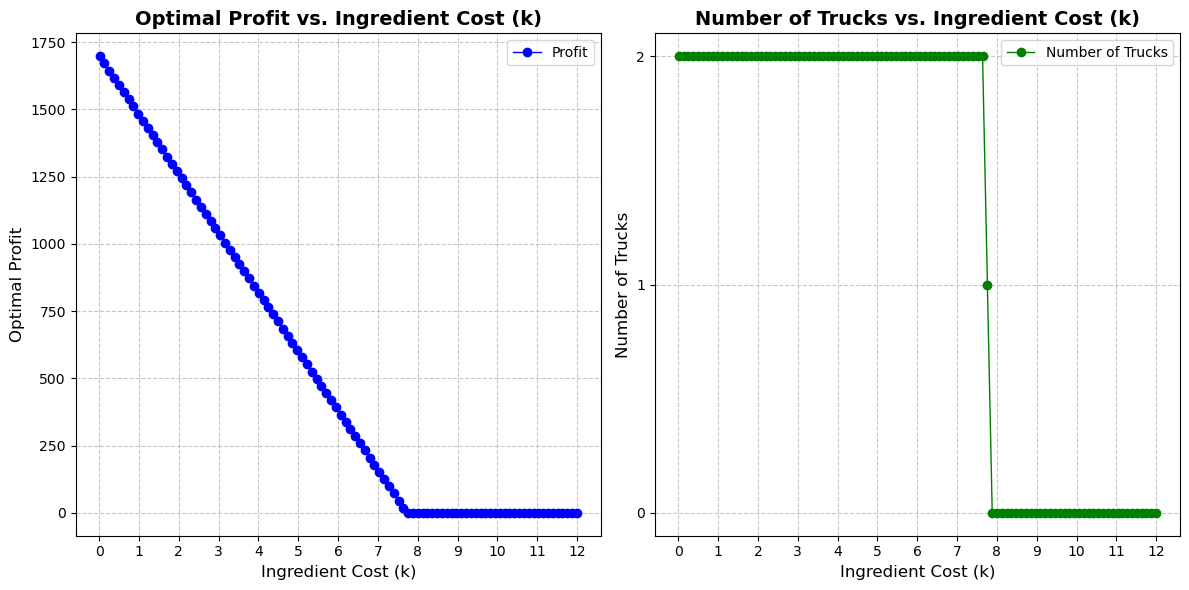

In [51]:
# Plot results
plt.figure(figsize=(12, 6))

# Plot profit vs. k
plt.subplot(1, 2, 1)
plt.plot(k_values, profits, marker='o', linewidth=1, color='blue', label='Profit')  # Add labels and consistent styling
plt.title('Optimal Profit vs. Ingredient Cost (k)', fontsize=14, fontweight='bold')
plt.xlabel('Ingredient Cost (k)', fontsize=12)
plt.ylabel('Optimal Profit', fontsize=12)
plt.xticks(np.arange(0, 13, 1))  # Set x-axis ticks to range from 0 to 12 with step 1
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)  # Add grid with light transparency

# Plot number of trucks vs. k
plt.subplot(1, 2, 2)
plt.plot(k_values, truck_counts, marker='o', linewidth=1, color='green', label='Number of Trucks')
plt.title('Number of Trucks vs. Ingredient Cost (k)', fontsize=14, fontweight='bold')
plt.xlabel('Ingredient Cost (k)', fontsize=12)
plt.ylabel('Number of Trucks', fontsize=12)
plt.xticks(np.arange(0, 13, 1))  # Set x-axis ticks to range from 0 to 12 with step 1
plt.yticks(np.arange(0, max(truck_counts) + 1, 1))  # Ensure integer ticks for the truck count
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)  # Add grid with light transparency

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


#### **Q6 Conclusions based on Day 1 Data**

##### **Q6a: Profit Comparison:**
- **Observation**: The left graph shows that as the ingredient cost ($k$) increases, the optimal profit ($Z$) decreases.
  - Profit becomes zero when $k$ is sufficiently high (around $k = 8$), as trucks cannot cover fixed costs.
- **Conclusion**: Profit **always decreases** as $k$ increases due to the reduction in $(r - k)$. Once $k$ is high enough, profit becomes zero.


##### **Q6b: Truck Deployment Comparison:**
- **Observation**: The right graph indicates that the number of trucks remains constant for lower $k$ (up to $k \approx 7.5$). Beyond this, trucks are removed as they cannot cover fixed costs.
- **Conclusion**: The number of trucks **decreases** when $k$ increases to the point where revenue no longer covers fixed costs. If $k$ remains manageable, the number of trucks stays the same. **The number of trucks can never increase as $k$ increases.**


***
***

## **Question 7:**


## **Q7a: Limited Capacity Formulation**

### **Decision Variables:**
1. $x_j$: Binary variable, $x_j = 1$ if a truck is placed at location $j$, 0 otherwise.
2. $y_{ij}$: Continuous variable, representing the fraction of demand from building $i$ assigned to truck $j$, where $y_{ij} \geq 0$.

### **Parameters:**
1. $r$: Revenue per unit of demand (selling price per burrito).
2. $k$: Cost per unit of demand (ingredient cost per burrito).
3. $f$: Fixed cost for operating a truck.
4. $d_i$: Total demand at building $i$.
5. $\alpha_{ij}$: Fraction of demand from building $i$ that actually walks to truck $j$, considering distance.
6. $C$: Capacity of each truck (75 burritos).

### **Objective Function:**
$$
\text{Maximize: } \sum_{i \in I} \sum_{j \in J} (r - k) \cdot \alpha_{ij} \cdot d_i \cdot y_{ij} - \sum_{j \in J} f \cdot x_j
$$

### **Constraints:**

1. **Demand Assignment Constraint:**
   $$
   \sum_{j \in J} y_{ij} \leq 1, \quad \forall i \in I
   $$
   This ensures that the total fraction of demand from building $i$ assigned to trucks does not exceed 1.

2. **Truck Capacity Constraint:**
   $$
   \sum_{i \in I} \alpha_{ij} \cdot d_i \cdot y_{ij} \leq C \cdot x_j, \quad \forall j \in J
   $$
   - The left-hand side calculates the scaled demand assigned to truck $j$.
   - The right-hand side represents the truck's capacity (75 burritos), but only if a truck is placed at location $j$ ($x_j = 1$).
   - If no truck is placed at location $j$ ($x_j = 0$), the constraint forces the scaled demand assigned to this truck to be zero.

3. **Demand and Truck Placement Constraint:**
   $$
   y_{ij} \leq x_j, \quad \forall i \in I, \forall j \in J
   $$
   This ensures that demand from building $i$ can only be assigned to truck $j$ if a truck is placed at location $j$.

4. **Non-negativity Constraint:**
   $$
   0 \leq y_{ij} \leq 1, \quad \forall i \in I, \forall j \in J
   $$
   Since we are allowing the demand from building $i$ to be split among multiple trucks, $y_{ij}$ can take fractional values between 0 and 1, representing the proportion of demand assigned to truck $j$. Therefore, $y_{ij}$ does not need to be a binary variable.

5. **Binary Variable Constraint:**
   $$
   x_j \in \{0, 1\}, \quad \forall j \in J
   $$
   This ensures that $x_j$ is a binary variable, indicating whether a truck is placed at location $j$.

### **Objective Function and Constraints:**

$$
\begin{aligned}
\text{Maximize: } & \sum_{i \in I} \sum_{j \in J} (r - k) \cdot \alpha_{ij} \cdot d_i \cdot y_{ij} - \sum_{j \in J} f x_j \\
\text{s.t.: } & \sum_{j \in J} y_{ij} \leq 1, \quad \forall i \in I \\
& \sum_{i \in I} \alpha_{ij}\cdot d_i\cdot y_{ij} \leq C x_j, \quad \forall j \in J \\
& y_{ij} \leq x_j, \quad \forall i \in I, \forall j \in J \\
& 0 \leq y_{ij} \leq 1, \quad \forall i \in I, \forall j \in J \\
& x_j \in \{0, 1\}, \quad \forall j \in J
\end{aligned}
$$


***

## **Q7b: Use Gurobi to Solve**

#### **Gurobi Code:**

In [52]:
# Import necessary libraries
from gurobipy import Model, GRB, quicksum

# Extract parameters
r = df_problem.loc[0, 'burrito_price']         # Revenue per unit
k = df_problem.loc[0, 'ingredient_cost']       # Cost per unit
f = df_problem.loc[0, 'truck_cost']            # Fixed cost per truck
C = 75                                         # Capacity of each truck

# Create sets and parameters
I = df_demand_node['index'].tolist()           # List of demand nodes (buildings)
J = df_truck_node['index'].tolist()            # List of truck nodes (locations)
demand = dict(zip(df_demand_node['index'], df_demand_node['demand']))  # Demand for each building

# Calculate scaled_demand and alpha
scaled_demand = {
    (row['demand_node_index'], row['truck_node_index']): row['scaled_demand']
    for _, row in df_demand_truck.iterrows()
}
alpha = {
    (i, j): scaled_demand[i, j] / demand[i]
    for (i, j) in scaled_demand
    if demand[i] != 0
}

# Truck coordinates (if needed for results)
truck_coordinates = {row['index']: (row['x'], row['y']) for _, row in df_truck_node.iterrows()}

# Initialize model
model = Model("Maximize_Profit_Q7B")

# Decision variables
x = model.addVars(J, vtype=GRB.BINARY, name="x")                 # Binary variables for truck locations
y = model.addVars(I, J, vtype=GRB.CONTINUOUS, lb=0.0, ub=1.0, name="y")                # Continuous variables for demand allocation

# Objective function: Maximize profit
model.setObjective(
    quicksum((r - k) * scaled_demand[i, j] * y[i, j]
             for i in I for j in J if (i, j) in scaled_demand) -
    quicksum(f * x[j] for j in J),
    GRB.MAXIMIZE
)

# Constraints

# 1. Demand Assignment Constraint
model.addConstrs(
    (quicksum(y[i, j] for j in J if (i, j) in scaled_demand) <= 1
     for i in I),
    name="Demand_Assignment_Constraint"
)

# 2. Demand and Truck Placement Constraint
model.addConstrs(
    (y[i, j] <= x[j] for i in I for j in J if (i, j) in scaled_demand),
    name="Demand_Truck_Link_Constraint"
)

# 3. Truck Capacity Constraint
model.addConstrs(
    (quicksum(scaled_demand[i, j] * y[i, j]
              for i in I if (i, j) in scaled_demand) <= C * x[j]
     for j in J),
    name="Truck_Capacity_Constraint"
)

# Set Gurobi parameters for solution pool
model.Params.PoolSearchMode = 2          # Explore the solution pool extensively
model.Params.PoolSolutions = 100         # Maximum number of solutions to store
model.Params.PoolGap = 0.0               # Find all optimal solutions within 0% of the optimal objective

# Optimize the model
model.optimize()

Set parameter PoolSearchMode to value 2
Set parameter PoolSolutions to value 100
Set parameter PoolGap to value 0
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (win64 - Windows 11.0 (22631.2))

CPU model: 13th Gen Intel(R) Core(TM) i7-13700KF, instruction set [SSE2|AVX|AVX2]
Thread count: 16 physical cores, 24 logical processors, using up to 24 threads

Optimize a model with 271 rows, 256 columns and 849 nonzeros
Model fingerprint: 0x7d40918c
Variable types: 240 continuous, 16 integer (16 binary)
Coefficient statistics:
  Matrix range     [1e+00, 8e+01]
  Objective range  [5e+00, 3e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective -0.0000000
Presolve removed 7 rows and 0 columns
Presolve time: 0.00s
Presolved: 264 rows, 256 columns, 797 nonzeros
Variable types: 240 continuous, 16 integer (16 binary)

Root relaxation: objective 3.687307e+02, 128 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |  

#### **Display the Result:**

In [53]:
# Check if optimal solution is found
if model.SolCount == 0:
    print("No feasible solution found.")
else:
    num_solutions = model.SolCount
    print(f"Number of solutions found: {num_solutions}")

    # Loop over all solutions
    for sol_num in range(num_solutions):
        model.setParam(GRB.Param.SolutionNumber, sol_num)

        # Get objective value for this solution
        obj_val = model.PoolObjVal
        # print(f"\n")
        print("-" * 58)
        print(f"Solution {sol_num + 1}:")

        # Retrieve variable values for this solution
        x_vals = {j: x[j].Xn for j in J if x[j].Xn > 0.5}
        y_vals = {(i, j): y[i, j].Xn for i in I for j in J if y[i, j].Xn > 1e-6}

        # Calculate total profit components for this solution
        total_sales_revenue = sum((r * scaled_demand[i, j] * y[i, j].Xn) for (i, j) in y_vals)
        total_ingredient_cost = sum((k * scaled_demand[i, j] * y[i, j].Xn) for (i, j) in y_vals)
        total_truck_cost = sum(f * x[j].Xn for j in x_vals)
        total_profit = total_sales_revenue - total_ingredient_cost - total_truck_cost
        truck_ids = ", ".join([f"{truck_id}" for truck_id in x_vals.keys()])
        # Print solution summary
        print(f"Number of Trucks Used: {len(x_vals)}")
        print(f"Sales Revenue: {total_sales_revenue:.2f}")
        print(f"TIngredient Cost: {total_ingredient_cost:.2f}")
        print(f"Truck Cost: {total_truck_cost:.2f}")
        print(f"Maximum Net Profit: {total_profit:.2f}")
        print(f"Truck Use: {truck_ids}")

        # Print truck details
        for j in x_vals:
            truck_profit = sum(
                (r - k) * scaled_demand[i, j] * y[i, j].Xn
                for i in I if (i, j) in y_vals
            ) - f
            print(f"\nTruck {j} is open at coordinates {truck_coordinates.get(j, (None, None))}:")
            for i in I:
                if (i, j) in y_vals and y_vals[(i, j)] > 0:
                    assigned_customers = scaled_demand[i, j] * y_vals[(i, j)]
                    print(f"    Building {i}: {assigned_customers:.1f} units")
            print(f"    Truck Profit (after fixed cost): {truck_profit:.2f}")

Number of solutions found: 4
----------------------------------------------------------
Solution 1:
Number of Trucks Used: 3
Sales Revenue: 2040.00
TIngredient Cost: 1020.00
Truck Cost: 750.00
Maximum Net Profit: 270.00
Truck Use: truck10, truck18, truck37

Truck truck10 is open at coordinates (336.71209330877844, 130.1068447412354):
    Building demand4: 15.0 units
    Building demand5: 6.0 units
    Building demand7: 3.0 units
    Building demand8: 30.0 units
    Building demand53: 18.0 units
    Truck Profit (after fixed cost): 110.00

Truck truck18 is open at coordinates (364.6678944137508, 222.6410684474124):
    Building demand11: 18.0 units
    Building demand22: 9.0 units
    Building demand51: 30.0 units
    Truck Profit (after fixed cost): 35.00

Truck truck37 is open at coordinates (209.35788827501537, 398.3939899833055):
    Building demand31: 5.0 units
    Building demand32: 29.0 units
    Building demand33: 7.0 units
    Building demand44: 13.0 units
    Building demand46

### **Q7b Summary**

#### **Key Insights**

1. **Original Assumptions (Unlimited Capacity per Truck):**
   - **Maximum Net Profit:** $600.
   - **Truck Usage and Demand Allocation:**

     | **Truck ID** | **Buildings Served**                                                   |
     |--------------|------------------------------------------------------------------------|
     | T22          | D4, D5, D7, D8, D53, D11, D22, D51                                    |
     | T37          | D31, D32, D33, D44, D46, D43, D41                                     |

2. **Revised Assumptions (Truck Capacity of 75 Burritos):**
   - **Maximum Net Profit:** $270 (across all solutions).
   - **Truck Usage and Demand Allocation Across Solutions:**

     | **Solution** | **Truck ID** | **Buildings Served**                                     |
     |--------------|--------------|--------------------------------------------------------|
     | Solution 1   | T10          | D4, D5, D7, D8, D53                                    |
     |              | T18          | D11, D22, D51                                          |
     |              | T37          | D31, D32, D33, D44, D46, D43, D41                      |
     | Solution 2   | T10          | D4, D5, D7, D8, D53                                    |
     |              | T18          | D11, D22, D51                                          |
     |              | T28          | D31, D32, D33, D46, D41                                |
     | Solution 3   | T10          | D4, D5, D7, D8, D53                                    |
     |              | T18          | D11, D22, D51                                          |
     |              | T41          | D31, D32, D33, D44, D43, D41                           |
     | Solution 4   | T10          | D4, D5, D7, D8, D53                                    |
     |              | T18          | D11, D22, D51                                          |
     |              | T38          | D31, D32, D33, D44, D46, D43, D41                      |

3. **Comparison of Solutions**

   | Metric                    | Original Assumptions (Unlimited) | Revised Assumptions (Capacity = 75, Multiple Solutions) |
   |---------------------------|-----------------------------------|--------------------------------------------------------|
   | **Total Sales Revenue**   | $2200                            | $2040                                                 |
   | **Total Ingredient Cost** | $1100                            | $1020                                                 |
   | **Total Truck Cost**      | $500                             | $750                                                  |
   | **Maximum Net Profit**    | $600                             | $270                                                  |
   | **Number of Trucks Used** | 2                                | 3                                                    |
   | **Demand Allocation**     | Unlimited (unconstrained)        | Constrained (≤75 burritos/truck)                      |

#### **Managerial Insights**
1. **Impact on Profit:**
   - The introduction of a 75-burrito capacity constraint per truck results in a significant decrease in net profit. The reduced capacity forces the deployment of an additional truck, increasing fixed costs while slightly reducing revenue.

2. **Operational Efficiency:**
   - Trucks under unlimited capacity can serve multiple demand nodes without restriction, maximizing profit by minimizing truck costs. In contrast, trucks with limited capacity are less flexible and may lead to suboptimal demand allocation and higher operational costs.

3. **Customer Satisfaction:**
   - The new constraint ensures demand is more evenly distributed across trucks, potentially reducing delays or overcrowding at trucks. However, this benefit might come at the expense of higher costs.

4. **Strategic Recommendations:**
   - **Optimize Truck Allocation:** Evaluate demand distribution patterns to strategically position trucks in high-demand areas. This minimizes the need for additional trucks and reduces operational costs under capacity constraints.
   - **Dynamic Scheduling:** Implement dynamic scheduling to adjust truck deployment based on peak and off-peak demand periods, ensuring the 75-burrito capacity is utilized effectively.
   - **Cost-Benefit Analysis:** Assess the trade-offs between deploying additional trucks versus maximizing existing truck capacity to balance service quality and profitability.
   - **Demand Redistribution:** Incentivize customers near underutilized trucks to adjust their preferences, such as through discounts or promotions, to optimize demand servicing across locations.
   - **Technological Integration:** Invest in predictive analytics to forecast demand and optimize truck placement in real-time, ensuring better decision-making and operational efficiency.
   - **Incremental Adjustments:** Experiment with slightly increasing truck capacity where operationally feasible to evaluate cost and profitability impacts while maintaining service standards.

***

## **Q7c: Formulate and Solve Multi-Truck Parking Model**

### **Decision Variables:**

1. $ x_j $: Integer variable representing the **number of trucks** placed at location $ j $, where $ x_j \geq 0 $.
2. $ y_{ij} $: Continuous variable representing the **fraction of demand** from building $ i $ assigned to location $ j $, where $ y_{ij} \geq 0 $.

### **Parameters:**

1. $ r $: Revenue per unit of demand (selling price per burrito).
2. $ k $: Cost per unit of demand (ingredient cost per burrito).
3. $ f $: Fixed cost for operating one truck.
4. $ d_i $: Total demand at building $ i $.
5. $ \alpha_{ij} $: Fraction of demand from building $ i $ that actually walks to location $ j $, considering distance.
6. $ C $: Capacity of each truck (75 burritos).

### **Objective Function:**

$$
\text{Maximize: } \sum_{i \in I} \sum_{j \in J} (r - k) \cdot \alpha_{ij} \cdot d_i \cdot y_{ij} \ - \sum_{j \in J} f \cdot x_j
$$

### **Constraints:**

1. **Demand Assignment Constraint:**
   $$
   \sum_{j \in J} y_{ij} \leq 1, \quad \forall i \in I
   $$
   This ensures that the total fraction of demand from building $ i $ assigned to locations does not exceed 1.

2. **Truck Capacity Constraint:**
   $$
   \sum_{i \in I} \alpha_{ij} \cdot d_i \cdot y_{ij} \leq C \cdot x_j, \quad \forall j \in J
   $$
   - The left-hand side $\sum_{i \in I} \alpha_{ij} \cdot d_i \cdot y_{ij}$ calculates the scaled demand assigned to location $ j $.
   - The right-hand side $ C \cdot x_j $ represents the total capacity of all trucks at location $ j $ (number of trucks $ x_j $ times capacity $ C $).
   - This ensures that the total expected customers at location $ j $ do not exceed the combined capacity of the trucks placed there.

3. **Demand and Truck Placement Constraint:**
   $$
   y_{ij} \leq x_j, \quad \forall i \in I, \forall j \in J
   $$
   This ensures that demand from building $ i $ can only be assigned to location $ j $ if trucks are placed there. Since $ y_{ij} $ is a fraction (maximum of 1) and $ x_j $ can be any non-negative integer, this constraint allows for proper scaling.

4. **Non-negativity and Integer Constraints:**
   $$
   0 \leq y_{ij} \leq 1, \quad \forall i \in I, \forall j \in J
   $$
   $$
   x_j \in \mathbb{Z}_+, \quad \forall j \in J
   $$
   - $ y_{ij} $ is non-negative, representing the fraction of demand.
   - $ x_j $ is a non-negative integer (can be zero), representing the number of trucks at location $ j $.

### **Objective Function and Constraints:**

$$
\begin{aligned}
\text{Maximize: } & \sum_{i \in I} \sum_{j \in J} (r - k) \cdot \alpha_{ij} \cdot  d_i \cdot y_{ij} - \sum_{j \in J} f x_j \\
\text{s.t.: } & \sum_{j \in J} y_{ij} \leq 1, \quad \forall i \in I \\
& \sum_{i \in I} \alpha_{ij} \cdot d_i \cdot y_{ij} \leq C x_j, \quad \forall j \in J \\
& y_{ij} \leq x_j, \quad \forall i \in I, \forall j \in J \\
& 0 \leq y_{ij} \leq 1, \quad \forall i \in I, \forall j \in J \\
& x_j \in \mathbb{Z}_+, \quad \forall j \in J
\end{aligned}
$$

#### **Use Gurobi to Solve:**

In [54]:
# Extract parameters
r = df_problem.loc[0, 'burrito_price']         # Revenue per unit
k = df_problem.loc[0, 'ingredient_cost']       # Cost per unit
f = df_problem.loc[0, 'truck_cost']            # Fixed cost per truck
C = 75                                         # Capacity of each truck

# Create sets and parameters
I = df_demand_node['index'].tolist()           # List of demand nodes (buildings)
J = df_truck_node['index'].tolist()            # List of truck nodes (locations)
demand = dict(zip(df_demand_node['index'], df_demand_node['demand']))  # Demand for each building

# Alpha calculation (ensure 'alpha' is a column in df_demand_truck)
scaled_demand = {(row['demand_node_index'], row['truck_node_index']): row['scaled_demand'] for _, row in df_demand_truck.iterrows()}
alpha = {(row['demand_node_index'], row['truck_node_index']): row['scaled_demand'] / demand[row['demand_node_index']] for _, row in df_demand_truck.iterrows()}

# Truck coordinates (if needed for results)
truck_coordinates = {row['index']: (row['x'], row['y']) for _, row in df_truck_node.iterrows()}

# Initialize the Gurobi model
model = Model("Maximize_Profit_Q7C")

# Decision variables
x = model.addVars(J, vtype=GRB.INTEGER, lb=0, name="x")  # Integer variables representing the number of trucks at each location
y = model.addVars(I, J, vtype=GRB.CONTINUOUS, lb=0.0, ub=1.0, name="y")  # Continuous variables for fraction of demand assigned

# Objective function: Maximize profit
# Profit = Total revenue from burrito sales - Total ingredient cost - Total fixed cost of trucks
model.setObjective(
    quicksum((r - k) * alpha[i, j] * demand[i] * y[i, j]  # Revenue minus ingredient cost for assigned demand
             for i in I for j in J if (i, j) in alpha) -
    quicksum(f * x[j] for j in J),  # Fixed cost for trucks placed at locations
    GRB.MAXIMIZE
)

# Constraints

# 1. Demand Assignment Constraint:
# Ensure the total fraction of demand assigned to all truck locations for each building does not exceed 1
model.addConstrs(
    (quicksum(y[i, j] for j in J if (i, j) in alpha) <= 1 for i in I),
    name="Demand_Assignment_Constraint"
)

# 2. Truck Capacity Constraint:
# The scaled demand assigned to each location must not exceed the total capacity of the trucks placed there
model.addConstrs(
    (quicksum(alpha[i, j] * demand[i] * y[i, j]  # Scaled demand assigned to trucks at a location
              for i in I if (i, j) in alpha) <= C * x[j]  # Capacity constraint: total capacity of trucks at location j
     for j in J),
    name="Truck_Capacity_Constraint"
)

# 3. Demand and Truck Placement Constraint:
# Demand can only be assigned to truck locations where trucks are actually placed
model.addConstrs(
    (y[i, j] <= x[j] for i in I for j in J if (i, j) in alpha),  # Link demand assignment to truck placement
    name="Demand_Truck_Link_Constraint"
)

# Gurobi parameters for finding multiple solutions
model.setParam(GRB.Param.PoolSearchMode, 2)  # Enable the solver to search for multiple optimal solutions
model.setParam(GRB.Param.PoolSolutions, 4)  # Limit the number of solutions to store in the solution pool (e.g., 10)

# Optimize the model
model.optimize()


Set parameter PoolSearchMode to value 2
Set parameter PoolSolutions to value 4
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (win64 - Windows 11.0 (22631.2))

CPU model: 13th Gen Intel(R) Core(TM) i7-13700KF, instruction set [SSE2|AVX|AVX2]
Thread count: 16 physical cores, 24 logical processors, using up to 24 threads

Optimize a model with 271 rows, 256 columns and 849 nonzeros
Model fingerprint: 0x1a9619aa
Variable types: 240 continuous, 16 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 8e+01]
  Objective range  [5e+00, 3e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective -0.0000000
Presolve time: 0.00s
Presolved: 271 rows, 256 columns, 849 nonzeros
Variable types: 240 continuous, 16 integer (0 binary)

Root relaxation: objective 3.726936e+02, 107 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Inc

#### **Display the Results:**

In [55]:
# Check if optimal solutions are found
if model.SolCount == 0:  # No feasible solutions found
    print("No feasible solution found.")
else:
    num_solutions = model.SolCount  # Get the number of solutions in the solution pool
    print(f"Number of solutions found: {num_solutions}")

    # Iterate through the solutions in the pool (up to 4 solutions)
    for sol_num in range(min(num_solutions, 4)):
        model.setParam(GRB.Param.SolutionNumber, sol_num)  # Set the solver to retrieve the current solution

        # Objective value for the current solution
        obj_val = model.PoolObjVal
        print("-" * 58)
        print(f"Solution {sol_num + 1}:")

        # Extract variable values for this solution
        x_vals = {j: x[j].Xn for j in J if x[j].Xn > 0.5}  # Trucks placed at each location
        y_vals = {(i, j): y[i, j].Xn for i in I for j in J if y[i, j].Xn > 1e-6}  # Demand allocation fractions

        # Calculate profit components for the current solution
        total_sales_revenue = sum((r * scaled_demand[i, j] * y[i, j].Xn) for (i, j) in y_vals)  # Total revenue
        total_ingredient_cost = sum((k * scaled_demand[i, j] * y[i, j].Xn) for (i, j) in y_vals)  # Total ingredient cost
        total_truck_cost = sum(f * x[j].Xn for j in x_vals)  # Total fixed cost for trucks
        total_profit = total_sales_revenue - total_ingredient_cost - total_truck_cost  # Net profit

        # Truck IDs used in this solution
        truck_ids = ", ".join([f"{truck_id}" for truck_id in x_vals.keys()])

        # Print summary of the solution
        print(f"Number of Trucks Used: {len(x_vals)}")
        print(f"Sales Revenue: {total_sales_revenue:.2f}")
        print(f"Ingredient Cost: {total_ingredient_cost:.2f}")
        print(f"Truck Cost: {total_truck_cost:.2f}")
        print(f"Maximum Net Profit: {total_profit:.2f}")
        print(f"Truck Use: {truck_ids}")

        # Print details of each truck in this solution
        for j in x_vals:
            # Calculate profit for each truck after considering its fixed cost
            truck_profit = sum(
                (r - k) * scaled_demand[i, j] * y[i, j].Xn
                for i in I if (i, j) in y_vals
            ) - f
            print(f"\nTruck {j} is open at coordinates {truck_coordinates.get(j, (None, None))}:")
            for i in I:
                if (i, j) in y_vals and y_vals[(i, j)] > 0:  # Demand served by this truck
                    assigned_customers = scaled_demand[i, j] * y_vals[(i, j)]  # Units assigned
                    print(f"    Building {i}: {assigned_customers:.1f} units")
            print(f"    Truck Profit (after fixed cost): {truck_profit:.2f}")

Number of solutions found: 4
----------------------------------------------------------
Solution 1:
Number of Trucks Used: 3
Sales Revenue: 2040.00
Ingredient Cost: 1020.00
Truck Cost: 750.00
Maximum Net Profit: 270.00
Truck Use: truck10, truck18, truck38

Truck truck10 is open at coordinates (336.71209330877844, 130.1068447412354):
    Building demand4: 15.0 units
    Building demand5: 6.0 units
    Building demand7: 3.0 units
    Building demand8: 30.0 units
    Building demand53: 18.0 units
    Truck Profit (after fixed cost): 110.00

Truck truck18 is open at coordinates (364.6678944137508, 222.6410684474124):
    Building demand11: 18.0 units
    Building demand22: 9.0 units
    Building demand51: 30.0 units
    Truck Profit (after fixed cost): 35.00

Truck truck38 is open at coordinates (112.44444444444444, 397.7729549248748):
    Building demand31: 10.0 units
    Building demand32: 28.0 units
    Building demand33: 21.0 units
    Building demand46: 9.0 units
    Building demand41

****

### **Q7c Summary**

#### **Key Insights**

1. **Question 7 Part B (Truck Capacity of 75 Burritos):**
   - **Maximum Net Profit:** $270 (across all solutions).
   - **Truck Usage and Demand Allocation Across Solutions:**

     | **Solution** | **Truck ID** | **Unit Served** | **Buildings Served**                              |
     |--------------|--------------|-----------------|--------------------------------------------------|
     | Solution 1   | T10          | 72              | D4, D5, D7, D8, D53                              |
     |              | T18          | 57              | D11, D22, D51                                    |
     |              | T37          | 75              | D31, D32, D33, D44, D46, D43, D41                |
     | Solution 2   | T10          | 72              | D4, D5, D7, D8, D53                              |
     |              | T18          | 57              | D11, D22, D51                                    |
     |              | T28          | 75              | D31, D32, D33, D46, D41                          |
     | Solution 3   | T10          | 72              | D4, D5, D7, D8, D53                              |
     |              | T18          | 57              | D11, D22, D51                                    |
     |              | T41          | 75              | D31, D32, D33, D44, D43, D41                     |
     | Solution 4   | T10          | 72              | D4, D5, D7, D8, D53                              |
     |              | T18          | 57              | D11, D22, D51                                    |
     |              | T38          | 75              | D31, D32, D33, D44, D46, D43, D41                |

2. **Question 7 Part C (Multiple Trucks Can Park at the Same Location):**
   - **Maximum Net Profit:** $270 (across all solutions).
   - **Truck Usage and Demand Allocation Across Solutions:**

     | **Solution** | **Truck ID** | **Unit Served** | **Buildings Served**                              |
     |--------------|--------------|-----------------|--------------------------------------------------|
     | Solution 2   | T10          | 72              | D4, D5, D7, D8, D53                              |
     |              | T18          | 57              | D11, D22, D51                                    |
     |              | T37          | 75              | D31, D32, D33, D44, D46, D43, D41                |
     | Solution 3   | T10          | 72              | D4, D5, D7, D8, D53                              |
     |              | T18          | 57              | D11, D22, D51                                    |
     |              | T28          | 75              | D31, D32, D33, D44, D46, D41                     |     
     | Solution 4   | T10          | 72              | D4, D5, D7, D8, D53                              |
     |              | T18          | 57              | D11, D22, D51                                    |
     |              | T41          | 75              | D31, D32, D33, D44, D46, D41                     |
     | Solution 1   | T10          | 72              | D4, D5, D7, D8, D53                              |
     |              | T18          | 57              | D11, D22, D51                                    |
     |              | T38          | 75              | D31, D32, D33, D46, D41                          |


3. **Comparison of Solutions:**

    | Metric                    | Part B: One Truck Per Location | Part C: Multiple Trucks Per Location |
    |---------------------------|--------------------------------|---------------------------------------|
    | **Total Sales Revenue**   | $2040                         | $2040                                |
    | **Total Ingredient Cost** | $1020                         | $1020                                |
    | **Total Truck Cost**      | $750                          | $750                                 |
    | **Maximum Net Profit**    | $270                          | $270                                 |
    | **Number of Trucks Used** | 3                             | 3                                    |
    | **Demand Allocation**     | Constrained (≤75 burritos/truck, one truck per location) | Constrained (≤75 burritos/truck, multiple trucks per location) |

#### **Managerial Insights**

1. **Truck Allocation and Utilization Efficiency:**
   - **Consistency in Truck Combinations**:
     The truck combinations used (e.g., T10, T18, T37, etc.) are identical in **Part B** and **Part C**. This indicates that even with the flexibility of allowing multiple trucks at the same location (Part C), the optimization model found no need to introduce additional trucks or alter truck placement.
   - **Service Demand and Capacity Utilization**:
     In both **Part B** and **Part C**, most trucks did not reach their full capacity (75 units). For instance:
       - In Solution 1:
         - T10 served 72 units.
         - T18 served 57 units.
       - Only a few trucks, such as T37 and T28, fully utilized their capacity at 75 units.
       - This suggests that the current demand is relatively dispersed, and most trucks can satisfy the demand without fully utilizing their capacity.
   - **Ineffectiveness of Additional Flexibility**:
     Allowing multiple trucks at the same location (Part C) did not enhance resource utilization or increase the number of trucks required. This indicates that this additional flexibility did not significantly impact the optimization results under the current conditions.

2. **Subtle Differences in Demand Allocation**:
   - **Origins of Allocation Differences**:
     While the total demand served by each truck remains consistent across both parts, there are minor differences in how specific demands are allocated:
       - For example, **D31** is served by T37 in **Part B**, but in **Part C**, it might be served by T28 in some solutions.
       - These differences arise because Gurobi's solver provides multiple optimal solutions, exploring alternative allocation patterns as long as they meet constraints and yield the same objective value.
   - **Significance of Allocation Differences**:
     These variations in demand allocation do not affect the total profit but highlight the flexibility of the model in finding diverse feasible solutions. Managers can select the most practical solution based on real-world considerations such as logistics routes or operational costs.

3. **Consistency in Profit and Resource Usage**:
   - **Maximum Net Profit**:
     Both parts achieve the same maximum net profit of $270, indicating that the flexibility introduced in **Part C** does not lead to a profit increase. This is because the current demand distribution and total demand can already be efficiently served without additional flexibility.
   - **Number of Trucks**:
     Both parts use three trucks, demonstrating that even with the added flexibility in **Part C**, the optimization model did not identify a need for more trucks to increase profits.
   - **Cost Consistency**:
     The total truck cost remains the same ($750), further illustrating that the flexibility in **Part C** did not result in significant cost optimization.

4. **Managerial Implications**:
   - **Potential of Flexibility**:
     Although **Part C** allows multiple trucks at the same location, this flexibility does not significantly benefit the current scenario due to:
       1. **Dispersed Demand**: The current demand distribution does not place high pressure on any single location, negating the need for multiple trucks to share the load.
       2. **Relatively Low Demand**: The overall demand is insufficient to fully utilize truck capacity, leaving no room for additional flexibility to make a significant difference.
   - **Diverse Optimal Solutions**:
     The multiple solutions presented in **Part C** demonstrate that demand allocation can vary while maintaining optimality. Managers can use this flexibility to choose solutions that align with operational constraints such as truck location, traffic conditions, or time constraints.
   - **System Stability**:
     The consistency in truck numbers, profits, and costs across both parts indicates a stable system capable of efficiently meeting demand under low-demand pressure. This stability reduces operational risks and simplifies logistics planning.
   - **Future Optimization Opportunities**:
     If future demand increases or becomes more concentrated (e.g., some demand nodes exceed single-truck capacity), the flexibility introduced in **Part C** could become more impactful. This flexibility would help reduce delivery pressure, and potentially increase the total number of trucks needed and profit.

***

## **Q7d Comparison Between Assumptions**

### **Statement Analysis**
"The number of trucks placed in the optimal solution under Assumption 2 can be **more than** or **the same as** the number of trucks placed in the optimal solution under Assumption 1."

1. **More Than: <font color='green'>Possible</font>**
   - Under Assumption 2, where each truck has a limited capacity (C), serving the same total demand may require more trucks compared to Assumption 1. For example:
     - If total demand exceeds C for a single truck, the model might need multiple trucks, increasing the total truck count.
   - **Example**: If total demand is 150 and C = 75:
     - Under Assumption 1 (unlimited capacity), 1 truck is sufficient.
     - Under Assumption 2 (limited capacity), at least 2 trucks are required.

2. **The Same As: <font color='green'>Possible</font>**
   - If the total demand assigned to any truck in Assumption 1 does not exceed C, the capacity constraint in Assumption 2 does not affect the solution. The number of trucks remains the same.
   - **Example**: If total demand is 65 and C = 75:
     - Both Assumption 1 and Assumption 2 require 1 truck.

3. **Less Than: <font color='red'>Not Possible</font>**
   - Due to the added constraint of limited truck capacity in Assumption 2, fewer trucks cannot meet the same demand as in Assumption 1. Therefore, the number of trucks under Assumption 2 cannot be less than the number of trucks under Assumption 1.


<hr style="border: 0.1px dashed;">

### **Nemerical Examples**

#### <u>**Scenario 1: Number of Trucks Increases**</u>

##### **Assumption 1: Unlimited Capacity**
- **Parameters**:
  - $r = 10$, $k = 5$ (ingredient cost).
  - $f = 250$ (fixed truck cost).
  - Total demand: 150 (split as $d_1 = 60$, $d_2 = 60$, $d_3 = 30$).
- **Truck Allocation**:
  - 1 truck serves $d_1$, $d_2$, and $d_3$.
- **Profit Calculation**:
  $$
  Z = \sum_{i \in I} \sum_{j \in J} (r - k) \cdot \alpha_{ij} \cdot d_i \cdot y_{ij} \ - \sum_{j \in J} f \cdot x_j
  $$

  $$
  Z = (10 - 5) \cdot 150 - 250 \cdot 1 = 500
  $$
- **Number of Trucks**: 1.

##### **Assumption 2: Limited Capacity (C = 75)**
- **Parameters**:
  - $r = 10$, $k = 5$ (ingredient cost).
  - $f = 250$ (fixed truck cost).
  - Total demand: 150 (split as $d_1 = 60$, $d_2 = 60$, $d_3 = 30$).
- **Truck Allocation**:
  - Truck 1 serves $d_1 = 60$, and Truck 2 serves $d_2 = 60$.
- **Profit Calculation**:
  $$
  Z = (10 - 5) \cdot 120 - 250 \cdot 2 = 100
  $$
- **Number of Trucks**: 2.

| **Scenario**         | **Unlimited Capacity** | **Limited Capacity (C = 75)** |
|-----------------------|------------------------|-------------------------------|
| **Total Profit**      | 500                    | 100                           |
| **Number of Trucks**  | 1                      | 2                             |


<hr style="border: 0.1px dashed;">

#### <u>**Scenario 2: Number of Trucks Remains the Same**</u>

##### **Assumption 1: Unlimited Capacity**
- **Parameters**:
  - $r = 10$, $k = 5$ (ingredient cost).
  - $f = 250$ (fixed truck cost).
  - Total demand: 65 (split as $d_1 = 20$, $d_2 = 30$, $d_3 = 15$).
- **Truck Allocation**:
  - 1 truck serves $d_1$, $d_2$, and $d_3$.
- **Profit Calculation**:
  $$
  Z = (10 - 5) \cdot 65 - 250 \cdot 1 = 75
  $$
- **Number of Trucks**: 1.

##### **Assumption 2: Limited Capacity (C = 75)**
- **Parameters**:
  - $r = 10$, $k = 5$ (ingredient cost).
  - $f = 250$ (fixed truck cost).
  - Total demand: 65 (split as $d_1 = 20$, $d_2 = 30$, $d_3 = 15$).
- **Truck Allocation**:
  - 1 truck serves $d_1$, $d_2$, and $d_3$.
- **Profit Calculation**:
  $$
  Z = (10 - 5) \cdot 65 - 250 \cdot 1 = 75
  $$
- **Number of Trucks**: 1.

| **Scenario**         | **Unlimited Capacity** | **Limited Capacity (C = 75)** |
|-----------------------|------------------------|-------------------------------|
| **Total Profit**      | 75                     | 75                            |
| **Number of Trucks**  | 1                      | 1                             |


<hr style="border: 0.1px dashed;">

#### **Summary of Assumptions**

1. **More Trucks Under Limited Capacity**:
   - When total demand exceeds a single truck's capacity, more trucks are required under Assumption 2.

2. **Same Number of Trucks**:
   - When total demand fits within a single truck's capacity, the number of trucks remains the same under both assumptions.

3. **Less Trucks Under Limited Capacity**:
   - This scenario is **not possible** as the capacity constraint in Assumption 2 can only increase or maintain the number of trucks, never decrease it.
